# Install missing libraries

In [73]:
!pip install streamlit
!pip install preprocessor
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.3 MB/s eta 0:00:00


In [74]:
# TODO - Sort imports alphabetically.

import warnings

import helper
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import preprocessor
import seaborn as sns
import streamlit as st
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm


# 2021 TOKYO OLYMPICS DATASETS
df_athletes = pd.read_excel("Athletes.xlsx")
df_coaches = pd.read_excel("Coaches.xlsx")
df_entries_gender = pd.read_excel("EntriesGender.xlsx")
df_medals = pd.read_excel("Medals.xlsx")
df_teams = pd.read_excel("Teams.xlsx")

# 2024 PARIS OLYMPICS DATASETS
df_paris_events = pd.read_csv("events.csv")
df_paris_schedules = pd.read_csv("schedules.csv")
df_paris_torch_route = pd.read_csv("torch_route.csv")
df_paris_venues = pd.read_csv("venues.csv")

# ADDITIONAL DATASETS
df_athlete_events = pd.read_csv("athlete_events.csv", on_bad_lines='skip')
df_noc_regions = pd.read_csv("noc_regions.csv")


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

import warnings

# Suppress the specific warning
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

df_athletes = pd.read_excel("Athletes.xlsx")
df_coaches = pd.read_excel("Coaches.xlsx")
df_entries_gender = pd.read_excel("EntriesGender.xlsx")
df_medals = pd.read_excel("Medals.xlsx")
df_teams = pd.read_excel("Teams.xlsx")

df_paris_events = pd.read_csv("events.csv")
df_paris_schedules = pd.read_csv("schedules.csv")
df_paris_torch_route = pd.read_csv("torch_route.csv")
df_paris_venues = pd.read_csv("venues.csv")

# Training linear regression

In [ ]:
df_athletes_cleaned = df_athletes.drop(["Name"], axis=1)
athlete_counts = df_athletes_cleaned.groupby(['NOC']).size().reset_index(name='Athlete Count')
athlete_counts_sorted = athlete_counts.sort_values(by='Athlete Count', ascending=False)
athlete_counts_sorted

,NOC,Athlete Count
195,United States of America,615
94,Japan,586
10,Australia,470
144,People's Republic of China,401
71,Germany,400
...,...,...
173,South Sudan,2
36,Central African Republic,2
157,Saint Kitts and Nevis,2
176,St Vincent and the Grenadines,2


In [ ]:
top_ten_total_medalists = df_medals.sort_values(by="Total", ascending=False).head(n=10)
top_ten_total_medalists

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
4,5,ROC,20,28,23,71,3
3,4,Great Britain,22,21,22,65,4
2,3,Japan,27,14,17,58,5
5,6,Australia,17,7,22,46,6
9,10,Italy,10,10,20,40,7
8,9,Germany,10,11,16,37,8
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10


Mean Absolute Error: 2.779425939278125
R-squared: -0.7890181430620917
                          NOC  Athlete_Count  Predicted_Total_Medals
0    United States of America            615               78.121702
1                       Japan            586               74.369703
2                   Australia            470               59.361710
3  People's Republic of China            401               50.434542
4                     Germany            400               50.305163
5                      France            377               47.329440
6                      Canada            368               46.165026
7               Great Britain            366               45.906268
8                       Italy            356               44.612475
9                       Spain            324               40.472339


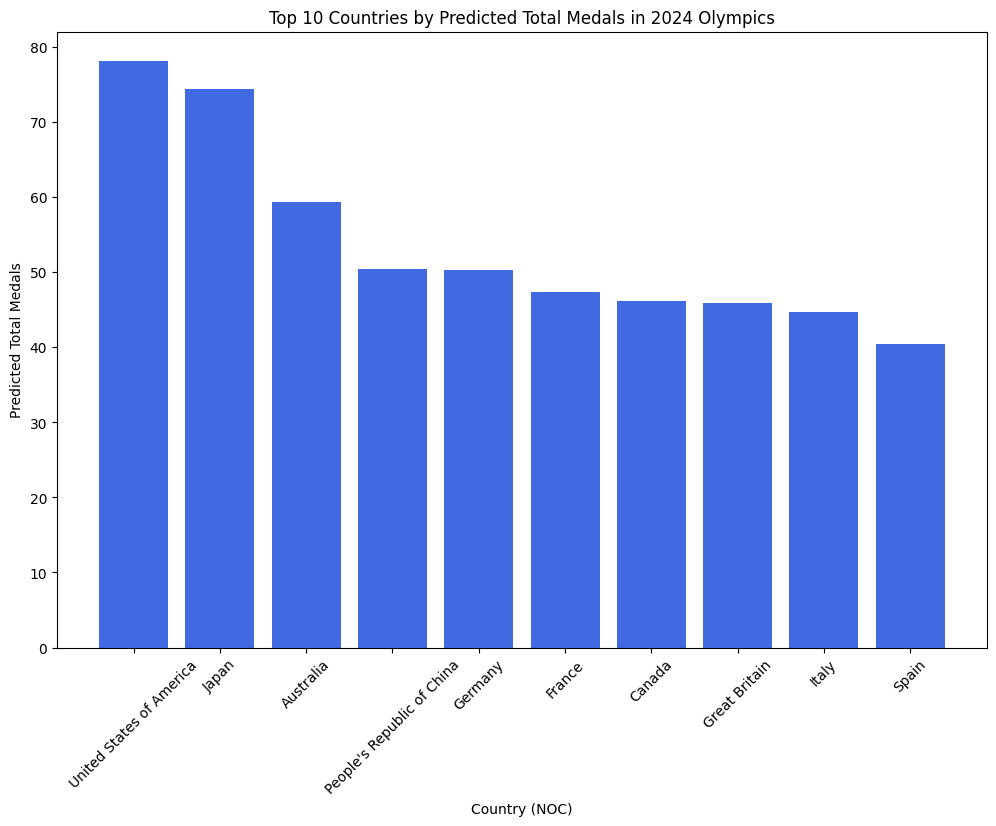

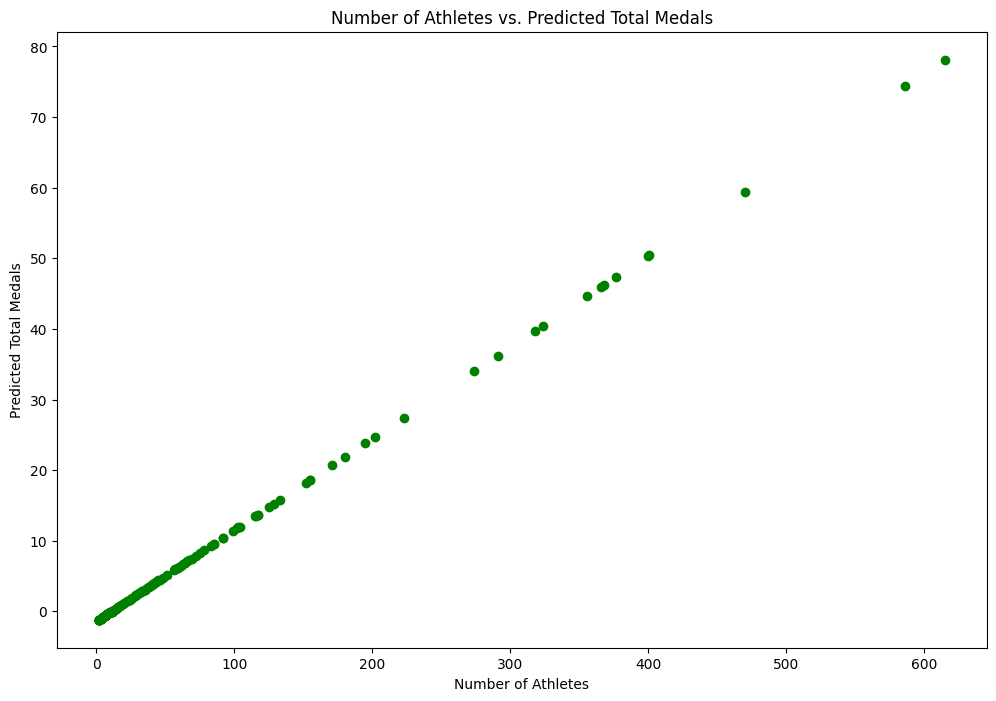

In [ ]:
# Calculate counts
athletes_count = df_athletes['NOC'].value_counts().reset_index()
athletes_count.columns = ['NOC', 'Athlete_Count']

coaches_count = df_coaches['NOC'].value_counts().reset_index()
coaches_count.columns = ['NOC', 'Coach_Count']

# Merge counts with medal data
combined_df = pd.merge(athletes_count, coaches_count, on='NOC', how='outer').fillna(0)
medal_counts = df_medals[['Team/NOC', 'Gold', 'Silver', 'Bronze', 'Total']]
medal_counts.columns = ['NOC', 'Gold_Medals', 'Silver_Medals', 'Bronze_Medals', 'Total_Medals']
combined_df = pd.merge(combined_df, medal_counts, on='NOC', how='left').fillna(0)

# Prepare the data
X = combined_df[['Athlete_Count']]
y = combined_df['Total_Medals']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Make predictions for 2024 Olympics
combined_df['Predicted_Total_Medals'] = model.predict(combined_df[['Athlete_Count']])
combined_df = combined_df.sort_values('Predicted_Total_Medals', ascending=False)

# Display the top predictions
print(combined_df[['NOC', 'Athlete_Count', 'Predicted_Total_Medals']].head(10))

# Visualization
# Bar chart of predicted medals
top_10_predictions = combined_df.head(10)
plt.figure(figsize=(12, 8))
plt.bar(top_10_predictions['NOC'], top_10_predictions['Predicted_Total_Medals'], color='royalblue')
plt.title('Top 10 Countries by Predicted Total Medals in 2024 Olympics')
plt.xlabel('Country (NOC)')
plt.ylabel('Predicted Total Medals')
plt.xticks(rotation=45)
plt.show()

# Scatter plot of athletes vs. medals
plt.figure(figsize=(12, 8))
plt.scatter(combined_df['Athlete_Count'], combined_df['Predicted_Total_Medals'], color='green')
plt.title('Number of Athletes vs. Predicted Total Medals')
plt.xlabel('Number of Athletes')
plt.ylabel('Predicted Total Medals')
plt.show()

# training using random forest

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Mean Absolute Error: 0.48515873015873023
R-squared: 0.9266352550032279
                           NOC  Athlete_Count  Coach_Count  \
0     United States of America            615         28.0   
3   People's Republic of China            401         12.0   
10                         ROC            318         12.0   
7                Great Britain            366          7.0   
1                        Japan            586         35.0   
2                    Australia            470         22.0   
8                        Italy            356         14.0   
4                      Germany            400          9.0   
12                 Netherlands            274         10.0   
5                       France            377         10.0   

    Predicted_Total_Medals  
0                99.726667  
3                82.050000  
10               70.090000  
7                62.210000  
1                58

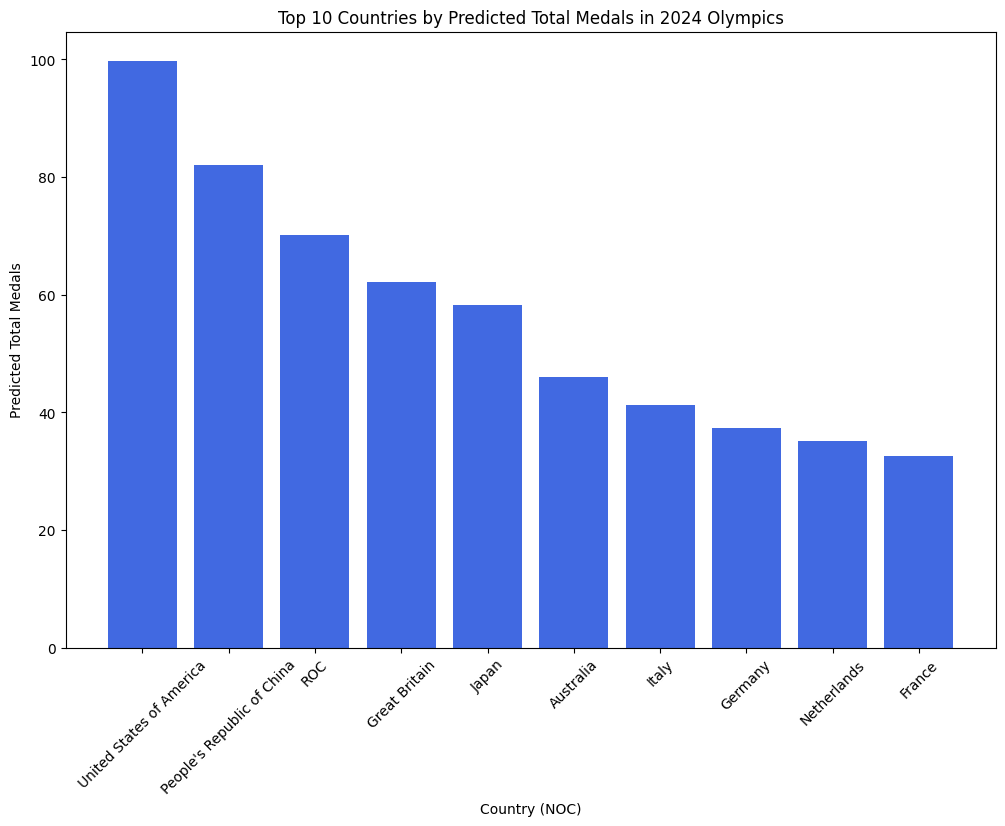

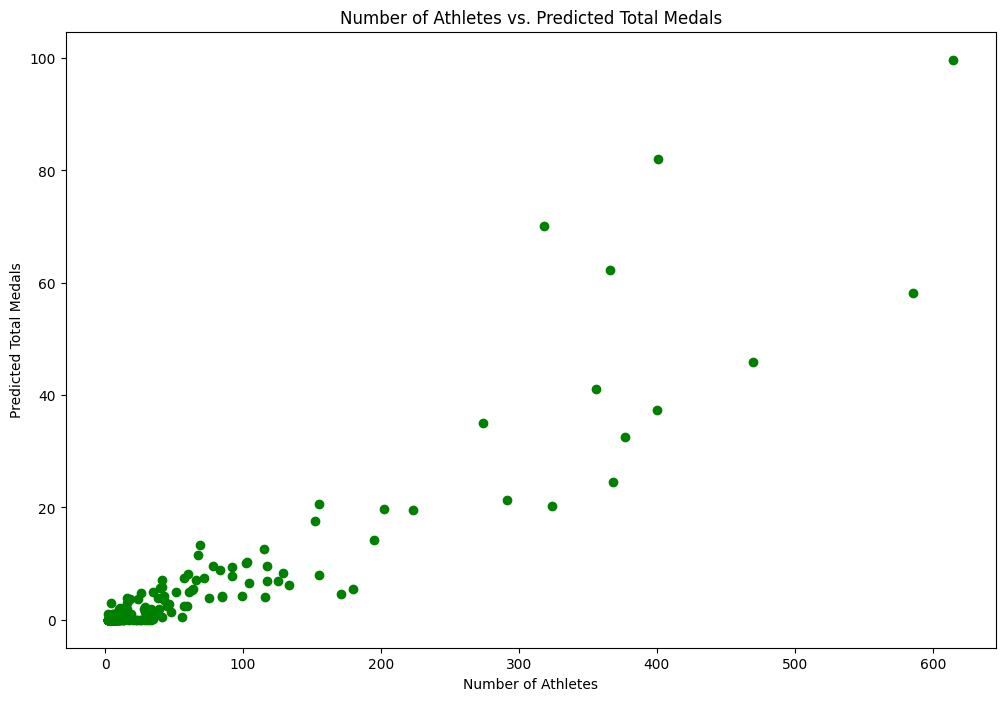

In [ ]:
# Merge counts with medal data
combined_df = pd.merge(athletes_count, coaches_count, on='NOC', how='outer').fillna(0)
medal_counts = df_medals[['Team/NOC', 'Gold', 'Silver', 'Bronze', 'Total']]
medal_counts.columns = ['NOC', 'Gold_Medals', 'Silver_Medals', 'Bronze_Medals', 'Total_Medals']
combined_df = pd.merge(combined_df, medal_counts, on='NOC', how='left').fillna(0)

# Prepare the data with additional features
X = combined_df[['Athlete_Count', 'Coach_Count', 'Gold_Medals', 'Silver_Medals', 'Bronze_Medals']]
y = combined_df['Total_Medals']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the model with the best parameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Make predictions for 2024 Olympics
combined_df['Predicted_Total_Medals'] = best_rf_model.predict(combined_df[['Athlete_Count', 'Coach_Count', 'Gold_Medals', 'Silver_Medals', 'Bronze_Medals']])
combined_df = combined_df.sort_values('Predicted_Total_Medals', ascending=False)

# Display the top predictions
print(combined_df[['NOC', 'Athlete_Count', 'Coach_Count', 'Predicted_Total_Medals']].head(10))

# Visualization
# Bar chart of predicted medals
top_10_predictions = combined_df.head(10)
plt.figure(figsize=(12, 8))
plt.bar(top_10_predictions['NOC'], top_10_predictions['Predicted_Total_Medals'], color='royalblue')
plt.title('Top 10 Countries by Predicted Total Medals in 2024 Olympics')
plt.xlabel('Country (NOC)')
plt.ylabel('Predicted Total Medals')
plt.xticks(rotation=45)
plt.show()

# Scatter plot of athletes vs. medals
plt.figure(figsize=(12, 8))
plt.scatter(combined_df['Athlete_Count'], combined_df['Predicted_Total_Medals'], color='green')
plt.title('Number of Athletes vs. Predicted Total Medals')
plt.xlabel('Number of Athletes')
plt.ylabel('Predicted Total Medals')
plt.show()

# Pie chart 01 - Top 10 countries with the most medals in total

In [ ]:
top_ten_total_medalists = df_medals.sort_values(by="Total", ascending=False).head(n=10)
top_ten_total_medalists
fig=px.pie(top_ten_total_medalists, values="Total", names="Team/NOC")
fig.show()

# Pie chart 02 - Top 10 countries with the most gold medals

In [ ]:
top_ten_golden_medalists = df_medals.sort_values(by="Gold", ascending=False).head(n=10)
top_ten_golden_medalists
fig=px.pie(top_ten_golden_medalists, values="Gold", names="Team/NOC")
fig.show()

Pie chart 03 - Top 10 countries with the most silver medals

In [ ]:
top_ten_silver_medalists = df_medals.sort_values(by="Silver", ascending=False).head(n=10)
top_ten_silver_medalists
fig=px.pie(top_ten_silver_medalists, values="Silver", names="Team/NOC")
fig.show()

# Pie chart 04 - Top 10 countries with the most bronze medals

In [ ]:
top_ten_bronze_medalists = df_medals.sort_values(by="Bronze", ascending=False).head(n=10)
top_ten_bronze_medalists
fig=px.pie(top_ten_bronze_medalists, values="Bronze", names="Team/NOC")
fig.show()

# Radar chart 01 - Distribution of medals by top five countries with the most medals



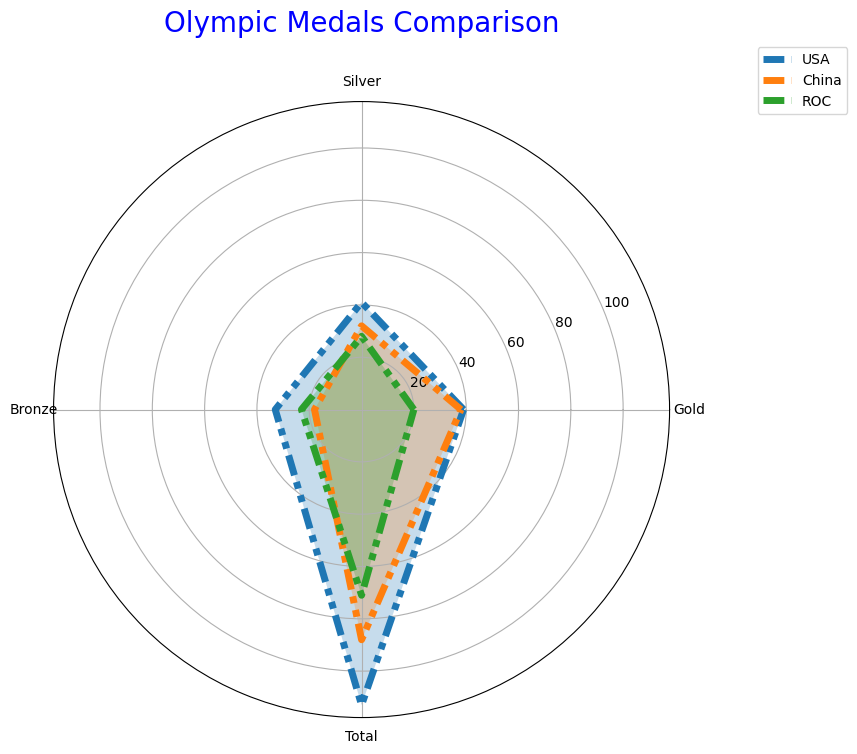

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data
categories = ["Gold", "Silver", "Bronze", "Total"]
united_states_of_america = [39, 41, 33, 113]
peoples_republic_of_china = [38, 32, 18, 88]
roc = [20, 28, 23, 71]
# great_britain = [22, 21, 22, 65]
# japan = [27, 14, 17, 58]

# Number of variables/categories
N = len(categories)

# Create a list of angles for the categories
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # Ensure the radar chart is a closed loop

# Function to plot the radar chart for a given team
def add_to_radar(ax, values, label):
    values += values[:1]  # Ensure the radar chart is a closed loop
    ax.plot(angles, values, linewidth=5, linestyle=(0, (3, 1, 1, 1, 1, 1)), label=label)
    ax.fill(angles, values, alpha=0.25)

# Create the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Add each team's data to the radar chart
add_to_radar(ax, united_states_of_america, 'USA')
add_to_radar(ax, peoples_republic_of_china, 'China')
add_to_radar(ax, roc, 'ROC')
# add_to_radar(ax, great_britain, 'Great Britain')
# add_to_radar(ax, japan, 'Japan')

# Add category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add title and legend
plt.title('Olympic Medals Comparison', size=20, color='blue', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Display the radar chart
plt.show()

# Radar chart 02

In [ ]:
df_athletes_cleaned = df_athletes.drop(["Name"], axis=1)
athlete_counts = df_athletes_cleaned.groupby(['Discipline', 'NOC']).size().reset_index(name='Athlete Count')

unique_disciplines = df_athletes_cleaned['Discipline'].nunique()
unique_disciplines

46

# Stagged bar chart 01

In [ ]:
# df_paris_schedules["sport"]
# df_paris_schedules["date_start_utc"]
#df_paris_schedules.groupby(["date_start_utc"]).size().sort_values(ascending=False)
df_paris_schedules_cleaned = df_paris_schedules[["date_start_utc", "sport"]]
df_paris_schedules_cleaned.groupby(["date_start_utc"]).size().sort_values(ascending=False)
df_paris_schedules_cleaned

,date_start_utc,sport
0,2024-07-25T07:30:00Z,Archery
1,2024-07-25T12:15:00Z,Archery
2,2024-07-28T07:30:00Z,Archery
3,2024-07-28T12:15:00Z,Archery
4,2024-07-28T13:47:00Z,Archery
...,...,...
2293,2024-08-11T11:00:00Z,Wrestling
2294,2024-08-11T11:20:00Z,Wrestling
2295,2024-08-11T11:45:00Z,Wrestling
2296,2024-08-11T09:00:00Z,Wrestling


# Athletes count by sport by country

In [ ]:
df_athletes_cleaned = df_athletes.drop(["Name"], axis=1)
athlete_counts = df_athletes_cleaned.groupby(['Discipline', 'NOC']).size().reset_index(name='Athlete Count')
athlete_counts

,Discipline,NOC,Athlete Count
0,3x3 Basketball,Belgium,4
1,3x3 Basketball,France,3
2,3x3 Basketball,Italy,4
3,3x3 Basketball,Japan,8
4,3x3 Basketball,Latvia,3
...,...,...,...
2107,Wrestling,Tunisia,9
2108,Wrestling,Turkey,9
2109,Wrestling,Ukraine,9
2110,Wrestling,United States of America,14


In [ ]:
cleaned = df_athletes.groupby(['NOC', 'Discipline'])
cleaned = cleaned.size()
cleaned

NOC          Discipline         
Afghanistan  Athletics              2
             Shooting               1
             Swimming               1
             Taekwondo              1
Albania      Artistic Gymnastics    1
                                   ..
Zambia       Swimming               2
Zimbabwe     Athletics              1
             Golf                   1
             Rowing                 1
             Swimming               2
Length: 2112, dtype: int64

# Analysis 01 - Prediction of olympic games winners by total medals

In [ ]:
df = pd.read_excel('Medals.xlsx')
label_encoder = LabelEncoder()
df['Team/NOC_Encoded'] = label_encoder.fit_transform(df['Team/NOC'])
df

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,Team/NOC_Encoded
0,1,United States of America,39,41,33,113,1,90
1,2,People's Republic of China,38,32,18,88,2,64
2,3,Japan,27,14,17,58,5,45
3,4,Great Britain,22,21,22,65,4,33
4,5,ROC,20,28,23,71,3,70
...,...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77,32
89,86,Grenada,0,0,1,1,77,35
90,86,Kuwait,0,0,1,1,77,50
91,86,Republic of Moldova,0,0,1,1,77,72


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 

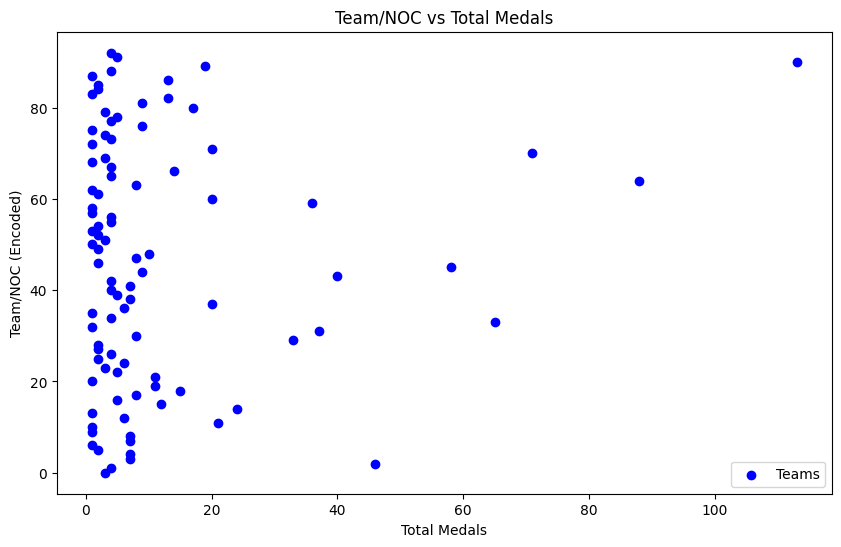

Predicted top teams for this year based on hypothetical medal counts:
Team: Italy, Total Medals: 40
Team: Netherlands, Total Medals: 35
Team: France, Total Medals: 30
Team: Brazil, Total Medals: 25
Team: Brazil, Total Medals: 20
Team: Cuba, Total Medals: 15
Team: Czech Republic, Total Medals: 10
Team: Uzbekistan, Total Medals: 5


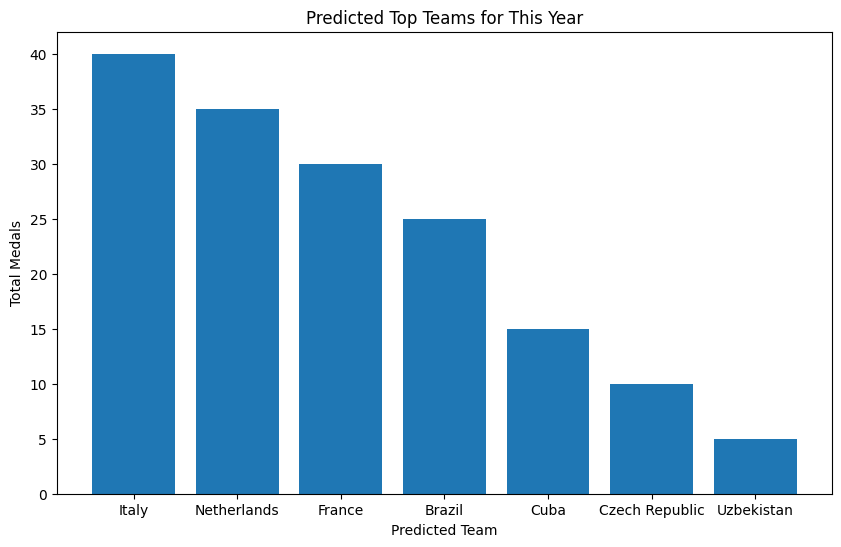

In [ ]:


# Load the Excel file
df = pd.read_excel('Medals.xlsx')

# Encode the Team/NOC
label_encoder = LabelEncoder()
df['Team/NOC_Encoded'] = label_encoder.fit_transform(df['Team/NOC'])

# Use Total Medals as feature and Team/NOC_Encoded as target
X = df[['Total']]
y = df['Team/NOC_Encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(df['Total'], df['Team/NOC_Encoded'], c='blue', label='Teams')
plt.xlabel('Total Medals')
plt.ylabel('Team/NOC (Encoded)')
plt.title('Team/NOC vs Total Medals')
plt.legend()
plt.show()

# Predict this year's winners
# Assuming similar medal counts, predict the top teams
future_medals = pd.DataFrame({'Total': [40, 35, 30, 25, 20, 15, 10, 5]})  # Hypothetical future medal counts
predictions = clf.predict(future_medals)

predicted_teams = label_encoder.inverse_transform(predictions)
print("Predicted top teams for this year based on hypothetical medal counts:")
for medals, team in zip(future_medals['Total'], predicted_teams):
    print(f"Team: {team}, Total Medals: {medals}")

# Additionally, visualize the predicted top teams
plt.figure(figsize=(10, 6))
plt.bar( predicted_teams, future_medals['Total'])
plt.xlabel('Predicted Team')
plt.ylabel('Total Medals')
plt.title('Predicted Top Teams for This Year')
plt.show()

# Stagged graph 01 - Entries by Discipline and number of females and males taking part in it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Discipline  46 non-null     object
 1   Female      46 non-null     int64 
 2   Male        46 non-null     int64 
 3   Total       46 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.6+ KB


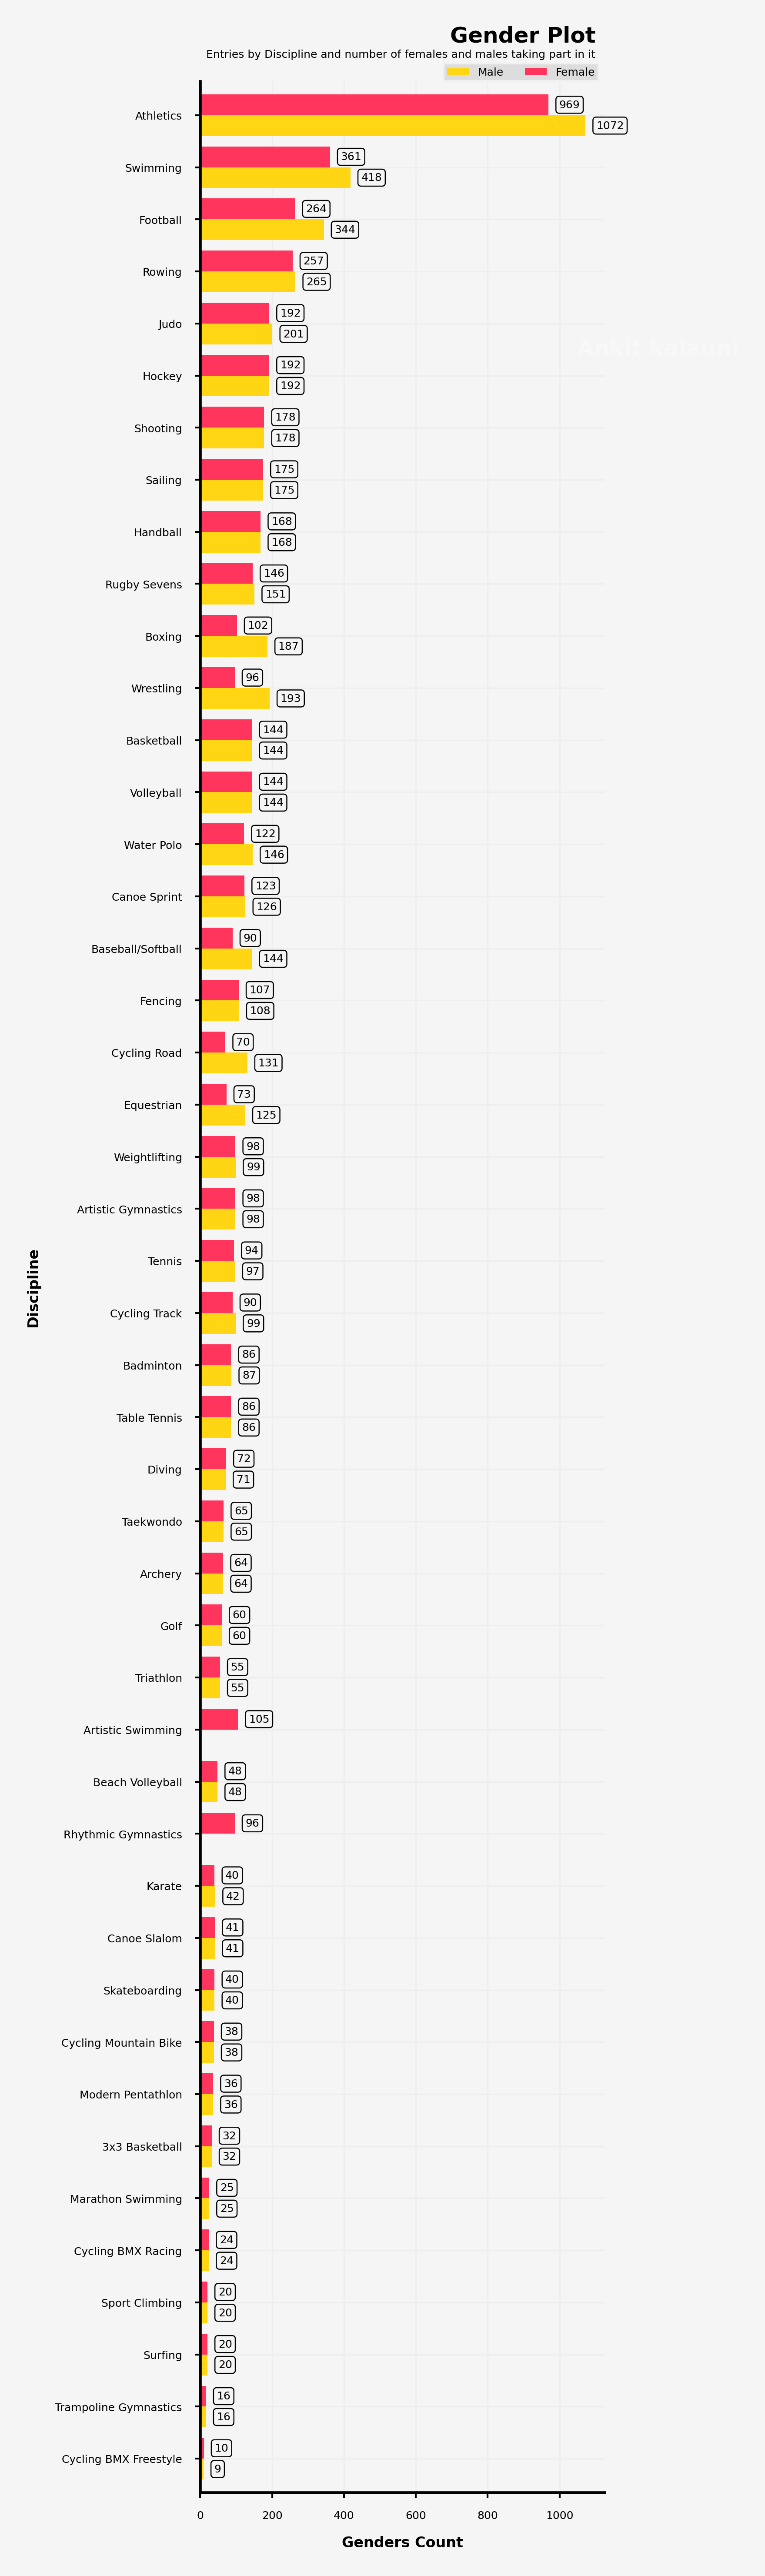

In [ ]:
# CHANGE BAR COLOURS

df_entries_gender.info()
df_entries_gender.describe().T

df_entries_gender.sort_values(by='Total',inplace=True)

# Gender barplot
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(2,12), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514','#ff355d'])
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.set_facecolor(background_color)


ax0_sns = df_entries_gender.plot(x='Discipline',y=['Male','Female'],kind='barh',ax=ax0,zorder=2,width=0.8) ##plotttt
ax0_sns.set_xlabel('Genders Count',fontsize=4, weight='bold',)
ax0_sns.set_ylabel('Discipline',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax0_sns.legend(['Male', 'Female'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1, 1.01), loc='upper right')

for p in ax0_sns.patches:
            value = f'{p.get_width():.0f}'
            if value == '0':
                pass
            else:
                x = p.get_x() + p.get_width() + 30
                y = p.get_y() + p.get_height() / 2
                ax0.text(x, y, value, ha='left', va='center', fontsize=3,
                        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))


ax0_sns.text(1100,46.4, f'Gender Plot', fontsize=6, weight='bold',ha='right')
ax0.text(1100, 46.11,f'Entries by Discipline and number of females and males taking part in it',fontsize=3,ha='right')
ax0_sns.text(1500,40.4, f'Ankit kalauni', fontsize=6, weight='bold',ha='right',color='w',alpha=0.3) #ignore this line if you reading this

#ax0.get_xaxis().set_m8ajor_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()


# Stacked bar graph 02: Medals won by each country showing gold, silver and bronze

In [ ]:
fig = px.bar(df_medals, x='Team/NOC', y=['Gold', 'Silver', 'Bronze'], color_discrete_sequence =['gold', 'silver', 'brown'],title='Number of medals won by each country')
fig.show()

# Overall Tally

In [ ]:
df_athlete_events['Medal'] = df_athlete_events['Medal'].fillna('None')  # Fill NaNs with 'None' to indicate no medal

# Check for existing dummy columns and drop them if they exist
if 'Gold' in df_athlete_events.columns:
    df_athlete_events.drop(['Gold', 'Silver', 'Bronze'], axis=1, inplace=True)

# Generate dummy columns for the Medal column
medal_dummies = pd.get_dummies(df_athlete_events['Medal'])

# Concatenate dummy columns to the original DataFrame
df_athlete_events = pd.concat([df_athlete_events, medal_dummies], axis=1)

# Now you can perform the groupby operation without column duplication issues
medal_tally = df_athlete_events.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

medal_tally['Total']=medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze']

# Display the medal tally
medal_tally


,NOC,Gold,Silver,Bronze,Total
0,USA,2638,1641,1358,5637
1,URS,1082,732,689,2503
2,GER,745,674,746,2165
3,GBR,678,739,651,2068
4,ITA,575,531,531,1637
...,...,...,...,...,...
225,LAO,0,0,0,0
226,AHO,0,1,0,1
227,LBR,0,0,0,0
228,LCA,0,0,0,0


# Distribution of sports by events during the period between 1896 - 2016

<Axes: xlabel='Year', ylabel='Sport'>

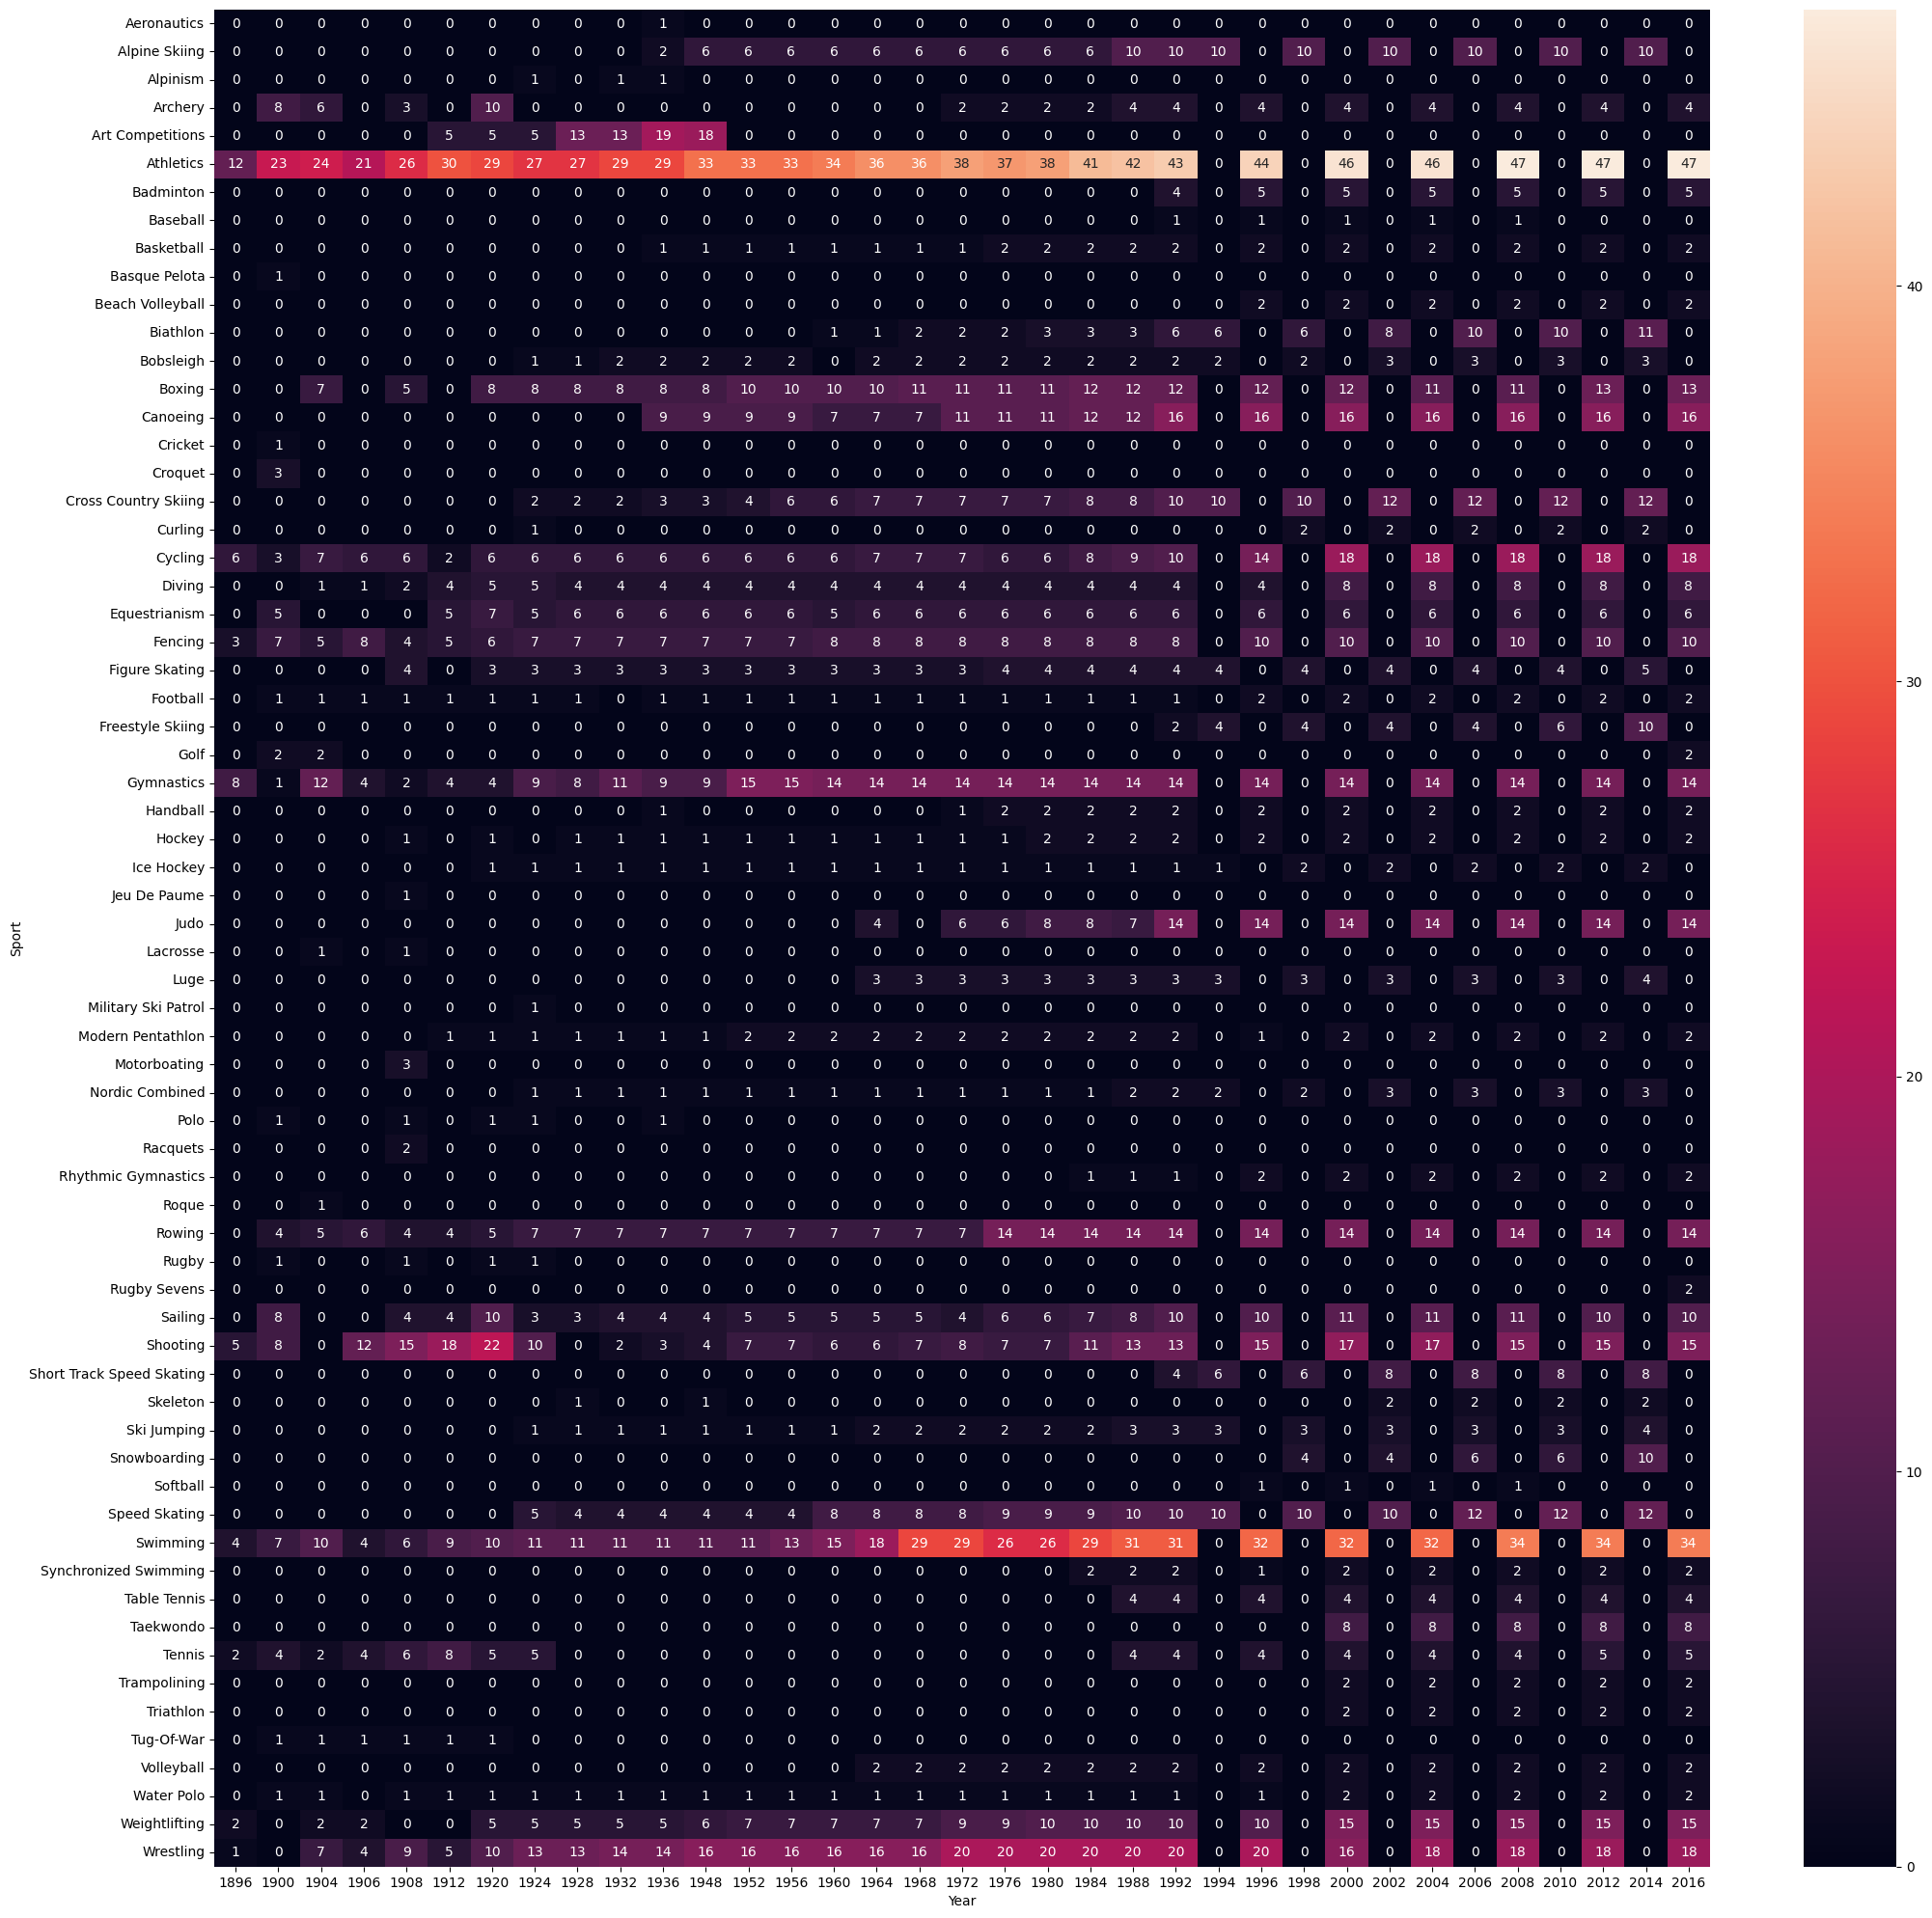

In [66]:
x = df_athlete_events.drop_duplicates(['Year', 'Sport', 'Event'])

plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'),annot=True)

# plt.figure(figsize=(25,25))
# sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'),annot=True)


# Random Trees

Text(0, 0.5, 'Predicted Total Medals')

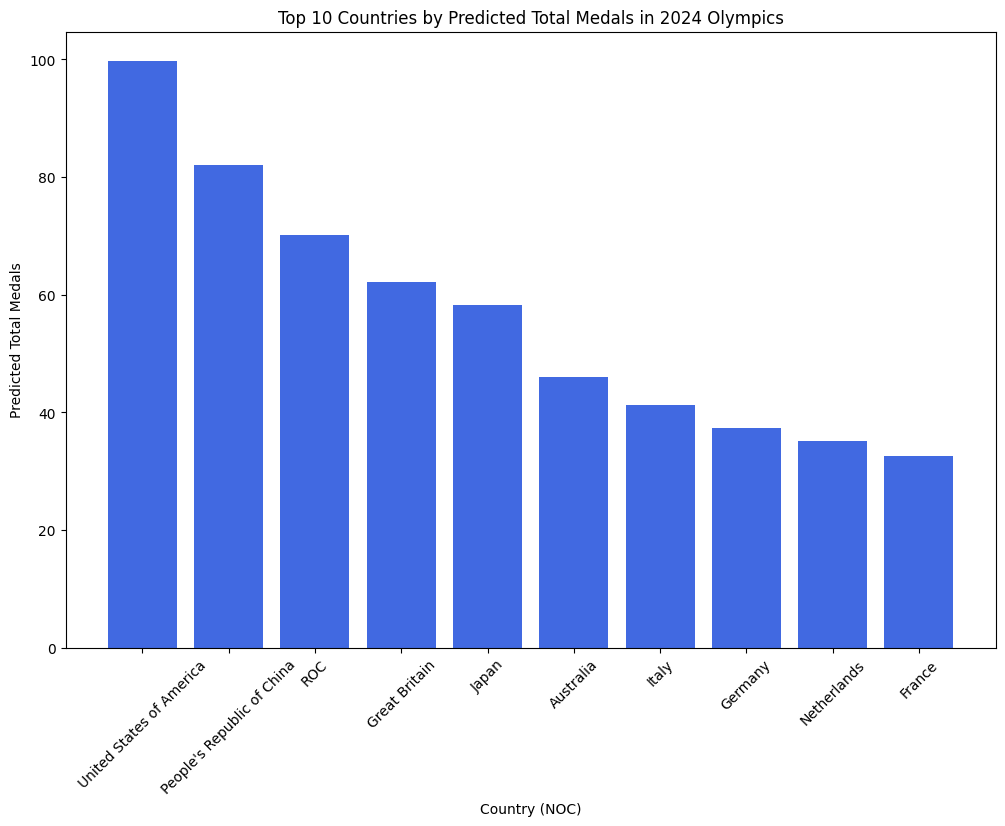

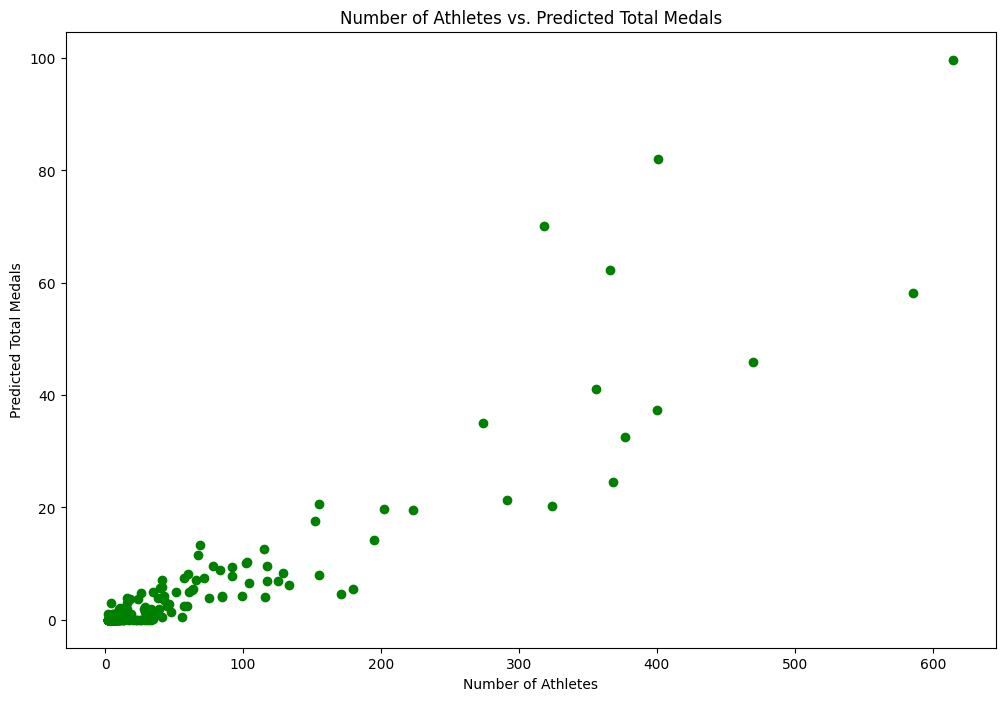

In [67]:
athletes_count = df_athletes['NOC'].value_counts().reset_index()
athletes_count.columns = ['NOC', 'Athlete_Count']

coaches_count = df_coaches['NOC'].value_counts().reset_index()
coaches_count.columns = ['NOC', 'Coach_Count']
# Merge counts with medal data
combined_df = pd.merge(athletes_count, coaches_count, on='NOC', how='outer').fillna(0)
medal_counts = df_medals[['Team/NOC', 'Gold', 'Silver', 'Bronze', 'Total']]
medal_counts.columns = ['NOC', 'Gold_Medals', 'Silver_Medals', 'Bronze_Medals', 'Total_Medals']
combined_df = pd.merge(combined_df, medal_counts, on='NOC', how='left').fillna(0)

# Prepare the data with additional features
X = combined_df[['Athlete_Count', 'Coach_Count', 'Gold_Medals', 'Silver_Medals', 'Bronze_Medals']]
y = combined_df['Total_Medals']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
# print(f'Best Parameters: {best_params}')

# Train the model with the best parameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print(f'Mean Absolute Error: {mae}')
# print(f'R-squared: {r2}')

# Make predictions for 2024 Olympics
combined_df['Predicted_Total_Medals'] = best_rf_model.predict(combined_df[['Athlete_Count', 'Coach_Count', 'Gold_Medals', 'Silver_Medals', 'Bronze_Medals']])
combined_df = combined_df.sort_values('Predicted_Total_Medals', ascending=False)

# Display the top predictions
# print(combined_df[['NOC', 'Athlete_Count', 'Coach_Count', 'Predicted_Total_Medals']].head(10))

# Visualization
# Bar chart of predicted medals
top_10_predictions = combined_df.head(10)
plt.figure(figsize=(12, 8))
plt.bar(top_10_predictions['NOC'], top_10_predictions['Predicted_Total_Medals'], color='royalblue')
plt.title('Top 10 Countries by Predicted Total Medals in 2024 Olympics')
plt.xlabel('Country (NOC)')
plt.ylabel('Predicted Total Medals')
plt.xticks(rotation=45)
# plt.show()

# Scatter plot of athletes vs. medals
plt.figure(figsize=(12, 8))
plt.scatter(combined_df['Athlete_Count'], combined_df['Predicted_Total_Medals'], color='green')
plt.title('Number of Athletes vs. Predicted Total Medals')
plt.xlabel('Number of Athletes')
plt.ylabel('Predicted Total Medals')
# plt.show()


# 2024 Olympic Medals Prediction

In [99]:
# LOAD DATASETS
athletes_data = pd.read_csv('prediction_datasets/olympic_athletes.csv')
hosts_data = pd.read_csv('prediction_datasets/olympic_hosts.csv')
medals_data = pd.read_csv('prediction_datasets/olympic_medals.csv')


In [100]:
# CREATE A MERGED DATASET
merge_1 = pd.merge(medals_data, hosts_data, left_on = 'slug_game', right_on = 'game_slug', how = 'inner')
merge_2 = pd.merge(athletes_data, medals_data, on = ['athlete_full_name', 'athlete_url'], how = 'inner')

merge_1.drop(['game_slug', 'game_end_date', 'game_start_date', 'country_code'], inplace = True, axis = 1)
merge_2.drop(['athlete_medals', 'bio'], inplace = True, axis = 1)

olympic_data = pd.merge(merge_1, merge_2, on = ['slug_game', 'athlete_full_name', 'discipline_title', 'event_title', 'event_gender', 'medal_type', 'participant_type', 'participant_title', 'country_name', 'country_3_letter_code', 'athlete_url'], how = 'inner')

print(olympic_data.shape)
olympic_data.head()


(16979, 19)


,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_3_letter_code,game_location,game_name,game_season,game_year,games_participations,first_game,athlete_year_birth,country_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,ITA,China,Beijing 2022,Winter,2022,1,Beijing 2022,1999.0,IT
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,ITA,China,Beijing 2022,Winter,2022,2,PyeongChang 2018,1995.0,IT
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NOR,China,Beijing 2022,Winter,2022,2,PyeongChang 2018,1986.0,NO
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NOR,China,Beijing 2022,Winter,2022,2,PyeongChang 2018,1990.0,NO
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SWE,China,Beijing 2022,Winter,2022,1,Beijing 2022,1997.0,SE


In [101]:
olympic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16979 entries, 0 to 16978
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   discipline_title       16979 non-null  object 
 1   slug_game              16979 non-null  object 
 2   event_title            16979 non-null  object 
 3   event_gender           16979 non-null  object 
 4   medal_type             16979 non-null  object 
 5   participant_type       16979 non-null  object 
 6   participant_title      2793 non-null   object 
 7   athlete_url            16979 non-null  object 
 8   athlete_full_name      16979 non-null  object 
 9   country_name           16979 non-null  object 
 10  country_3_letter_code  16979 non-null  object 
 11  game_location          16979 non-null  object 
 12  game_name              16979 non-null  object 
 13  game_season            16979 non-null  object 
 14  game_year              16979 non-null  int64  
 15  ga

In [102]:
olympic_data.isnull().sum()

discipline_title             0
slug_game                    0
event_title                  0
event_gender                 0
medal_type                   0
participant_type             0
participant_title        14186
athlete_url                  0
athlete_full_name            0
country_name                 0
country_3_letter_code        0
game_location                0
game_name                    0
game_season                  0
game_year                    0
games_participations         0
first_game                   1
athlete_year_birth         183
country_code              1038
dtype: int64

In [103]:
# DELETION AND IMPUTATION
missing_data = (olympic_data.isna().sum()/len(olympic_data)).round(2)
missing_data_columns = missing_data[missing_data >= 0.2]
print(missing_data_columns)

delete_threshold = 0.2
olympic_data_no_na = olympic_data.drop(columns = missing_data[missing_data > delete_threshold].index)
olympic_data_no_na.isnull().sum()[olympic_data.isnull().sum() > 0]

participant_title    0.84
dtype: float64


first_game               1
athlete_year_birth     183
country_code          1038
dtype: int64

In [104]:
olympic_data = olympic_data_no_na.copy()
olympic_data.head(5)

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,athlete_url,athlete_full_name,country_name,country_3_letter_code,game_location,game_name,game_season,game_year,games_participations,first_game,athlete_year_birth,country_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,ITA,China,Beijing 2022,Winter,2022,1,Beijing 2022,1999.0,IT
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,ITA,China,Beijing 2022,Winter,2022,2,PyeongChang 2018,1995.0,IT
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NOR,China,Beijing 2022,Winter,2022,2,PyeongChang 2018,1986.0,NO
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NOR,China,Beijing 2022,Winter,2022,2,PyeongChang 2018,1990.0,NO
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SWE,China,Beijing 2022,Winter,2022,1,Beijing 2022,1997.0,SE


In [105]:
# PREPROCESSING

unique_counts = {}

for col in olympic_data:
    unique_count = olympic_data[col].nunique()
    unique_counts[col] = unique_count

print('Unique value counts for each column:')
for col, count in unique_counts.items():
    print(f'{col}: {count}')

Unique value counts for each column:
discipline_title: 64
slug_game: 53
event_title: 1183
event_gender: 4
medal_type: 3
participant_type: 2
athlete_url: 12086
athlete_full_name: 12071
country_name: 149
country_3_letter_code: 149
game_location: 26
game_name: 53
game_season: 2
game_year: 37
games_participations: 10
first_game: 53
athlete_year_birth: 157
country_code: 139


In [106]:
unique_counts = {}

for col in olympic_data:
    unique_count = olympic_data[col].nunique()
    unique_counts[col] = unique_count

print('Unique value counts for each column:')
for col, count in unique_counts.items():
    print(f'{col}: {count}')

Unique value counts for each column:
discipline_title: 64
slug_game: 53
event_title: 1183
event_gender: 4
medal_type: 3
participant_type: 2
athlete_url: 12086
athlete_full_name: 12071
country_name: 149
country_3_letter_code: 149
game_location: 26
game_name: 53
game_season: 2
game_year: 37
games_participations: 10
first_game: 53
athlete_year_birth: 157
country_code: 139


In [107]:
mapping = {'Gymnastics Artistic': 'Artistic Gymnastics',
           'Gymnastics Rhythmic': 'Rhythmic Gymnastics',
           'Synchronized Swimming': 'Artistic Swimming',
           'Equestrian Dressage': 'Equestrian',
           'Equestrian Jumping': 'Equestrian',
           'Equestrian Eventing': 'Equestrian',
           'Trampoline': 'Trampoline Gymnastics',
           'Cycling BMX': 'Cycling BMX Racing',
           'Short Track Speed Skating': 'Short Track'}

olympic_data['discipline_title'] = olympic_data['discipline_title'].replace(mapping)

olympic_data['discipline_title'].nunique()

55

In [108]:
mapping = {'United States of America': 'USA',
           "People's Republic of China": 'China',
           'Republic of Korea': 'South Korea',
           'Islamic Republic of Iran': 'Iran',
           'Chinese Taipei': 'Taiwan',
           'Olympic Athletes from Russia': 'Russia',
           'German Democratic Republic (Germany)': 'Germany',
           'Federal Republic of Germany': 'Germany',
           "Democratic People's Republic of Korea": 'North Korea',
           'ROC': 'Russia'}

olympic_data['country_name'] = olympic_data['country_name'].replace(mapping)

olympic_data['country_name'].nunique()

146

In [109]:
unique_values = olympic_data['country_name'].unique()

print('Unique values in the column:')
for value in unique_values:
    print(value)

Unique values in the column:
Italy
Norway
Sweden
Canada
Japan
New Zealand
USA
Russia
Switzerland
China
France
Australia
Germany
Ukraine
Belarus
Estonia
Netherlands
Hungary
South Korea
Belgium
Spain
Slovenia
Austria
Czech Republic
Poland
Slovakia
Finland
San Marino
Serbia
Cuba
Great Britain
Bulgaria
Iran
Kuwait
Denmark
Mexico
Republic of Moldova
Brazil
Portugal
Ecuador
Ireland
Philippines
Kazakhstan
Uzbekistan
Azerbaijan
Ghana
Thailand
Turkey
India
Taiwan
Armenia
Colombia
Bermuda
South Africa
Egypt
Jordan
Croatia
North Macedonia
Côte d'Ivoire
Tunisia
Israel
Malaysia
Hong Kong, China
Romania
Indonesia
Mongolia
Kyrgyzstan
Nigeria
Georgia
Greece
Venezuela
Kosovo
Dominican Republic
Syrian Arab Republic
Turkmenistan
Qatar
Latvia
Lithuania
Kenya
Burkina Faso
Uganda
Ethiopia
Jamaica
Puerto Rico
Bahrain
Morocco
Namibia
Grenada
Bahamas
Saudi Arabia
Liechtenstein
Russian Federation
Vietnam
North Korea
Independent Olympic Athletes
Tajikistan
Algeria
Trinidad and Tobago
Burundi
Argentina
United Ara

In [110]:
mapping = {'United States of America': 'USA',
           "People's Republic of China": 'China',
           'Republic of Korea': 'South Korea',
           'Islamic Republic of Iran': 'Iran',
           'Chinese Taipei': 'Taiwan',
           'Olympic Athletes from Russia': 'Russia',
           'German Democratic Republic (Germany)': 'Germany',
           'Federal Republic of Germany': 'Germany',
           "Democratic People's Republic of Korea": 'North Korea',
           'ROC': 'Russia'}

olympic_data['country_name'] = olympic_data['country_name'].replace(mapping)

olympic_data['country_name'].nunique()

146

In [111]:
unique_values = olympic_data['game_location'].unique()

print('Unique values in the column:')
for value in unique_values:
    print(value)

Unique values in the column:
China
Japan
Republic of Korea
Brazil
Russian Federation
Great Britain
Canada
Italy
Greece
United States
Australia
Norway
Spain
France
Yugoslavia
USSR
Austria
Federal Republic of Germany
Mexico
Australia, Sweden
Finland
Switzerland
Germany
Netherlands
Belgium
Sweden


In [112]:
# VISUALIZATION AND GRAPH

filtered_data = olympic_data[olympic_data['game_season'] == 'Summer'].reset_index(drop = True)
filtered_data['game_year']

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
13887    1896
13888    1896
13889    1896
13890    1896
13891    1896
Name: game_year, Length: 13892, dtype: int64

In [113]:
def olympic_season(season):
    filtered_data = olympic_data[olympic_data['game_season'] == season].reset_index(drop = True)

    sort_data = filtered_data.groupby(['discipline_title', 'game_year'])['participant_type'].count().reset_index()
    heatmap = sort_data.pivot('discipline_title', 'game_year', 'participant_type')

    heatmap[heatmap > 0] = 1
    final_col = heatmap.columns[-1]

    disciplines_playing = heatmap[heatmap[final_col] == 1].sort_values(final_col)
    disciplines_not = heatmap[heatmap[final_col] != 1].sort_values(final_col)
    heatmap = pd.concat([disciplines_playing, disciplines_not])

    return heatmap

def plot_heatmap(data, title, size):
    data_sorted = data.sort_index()

    plt.figure(figsize = size)
    ax = sns.heatmap(data_sorted, annot = False, cbar = False,
                     linewidths = 1, linecolor = 'black',
                     square = True, cmap = 'summer')

    ax.xaxis.tick_top()
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    ax.tick_params(axis = 'x', labelsize = 12)
    ax.tick_params(axis = 'y', labelsize = 16)

    ax.spines[['bottom', 'right']].set_visible(True)
    ax.set_title(f'{title} Games \n', size = 22)

    plt.tight_layout()
    plt.show()

In [114]:
fitted_series_dict = {}

def forecast(model, df, periods, country_name):
    global fitted_series_dict

    df.index = pd.to_datetime(df.index, format = '%Y')

    n_periods = periods
    fitted, confint = model.predict(n_periods = n_periods, return_conf_int = True)

    last_index = df.index[-1]

    index_of_fc = pd.date_range(last_index, periods = n_periods + 1, freq = '2YS')[1:]

    fitted_series = pd.Series(fitted.values, index = index_of_fc)
    fitted_series_dict[country_name] = fitted_series

    lower_series = pd.Series(confint[:, 0], index = index_of_fc)
    upper_series = pd.Series(confint[:, 1], index = index_of_fc)

    observed_values = df[-len(fitted_series):]
    rmse = np.sqrt(np.mean((fitted - observed_values.values) ** 2))
    print('RMSE:', rmse)

    plt.figure(figsize = (15, 7))
    plt.plot(df.index, df.values, color = '#1f76b4', label = 'Original')
    plt.plot(fitted_series.index, fitted_series.values, color = 'darkgreen', label = 'Forecast')
    plt.fill_between(lower_series.index,
                    lower_series,
                    upper_series,
                    color = 'k', alpha = .15)

    plt.title('Forecast')
    plt.xlabel('Year')
    plt.ylabel('Medals')
    plt.legend()
    plt.show()

In [115]:
def get_medal_counts_for_countries(countries, medals, season):
    medal_counts_dict = {}
    years = set()

    for country in countries:
        medal_counts_dict[country] = get_medal_counts(country, medals, season)
        years.update(medal_counts_dict[country].keys())

    medal_counts_df = pd.DataFrame(index = sorted(years), columns = countries)

    for country in countries:
        for year, count in medal_counts_dict[country].items():
            medal_counts_df.at[year, country] = count

    medal_counts_df = medal_counts_df.astype(int)

    return medal_counts_df

def get_medal_counts(country, medals, season):
    year_counts = pd.DataFrame(columns = ('index', 'game_year'))
    year_counts['index'] = olympic_data['game_year'].unique()
    year_counts['game_year'] = 0
    year_counts = year_counts.sort_values(by = 'index')

    if (medals == 'ALL') and (season == 'Both Seasons'):
        filtered_data = olympic_data[(olympic_data['country_name'] == country)]
    elif (medals == 'ALL') or (season == 'Both Seasons'):
        filtered_data = olympic_data[(olympic_data['country_name'] == country) &
                                     ((olympic_data['game_season'] == season) |
                                      (olympic_data['medal_type'] == medals))]
    else:
        filtered_data = olympic_data[(olympic_data['country_name'] == country) &
                                     (olympic_data['game_season'] == season) &
                                     (olympic_data['medal_type'] == medals)]

    medal_counts = filtered_data['game_year'].value_counts().to_dict()

    for year, count in medal_counts.items():
        year_counts.loc[year_counts['index'] == year, 'game_year'] = count

    medal_counts = year_counts.set_index('index')['game_year'].squeeze()

    return medal_counts

# Example usage:
countries = ['USA', 'Germany', 'Soviet Union', 'Great Britain', 'China', 'France', 'Italy', 'Sweden', 'Japan', 'Norway']
medals = "ALL"
season = "Both Seasons"
medal_counts_df = get_medal_counts_for_countries(countries, medals, season)
medal_counts_df.reset_index(inplace = True)
print(medal_counts_df.info())
medal_counts_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   index          37 non-null     int64
 1   USA            37 non-null     int64
 2   Germany        37 non-null     int64
 3   Soviet Union   37 non-null     int64
 4   Great Britain  37 non-null     int64
 5   China          37 non-null     int64
 6   France         37 non-null     int64
 7   Italy          37 non-null     int64
 8   Sweden         37 non-null     int64
 9   Japan          37 non-null     int64
 10  Norway         37 non-null     int64
dtypes: int64(11)
memory usage: 3.3 KB
None


,index,USA,Germany,Soviet Union,Great Britain,China,France,Italy,Sweden,Japan,Norway
0,1896,11,10,0,6,0,10,0,0,0,0
1,1900,37,2,0,25,0,44,5,1,0,4
2,1904,164,12,0,2,0,0,0,0,0,1
3,1908,33,12,0,95,0,12,3,19,0,5
4,1912,44,20,0,22,0,12,4,45,0,2


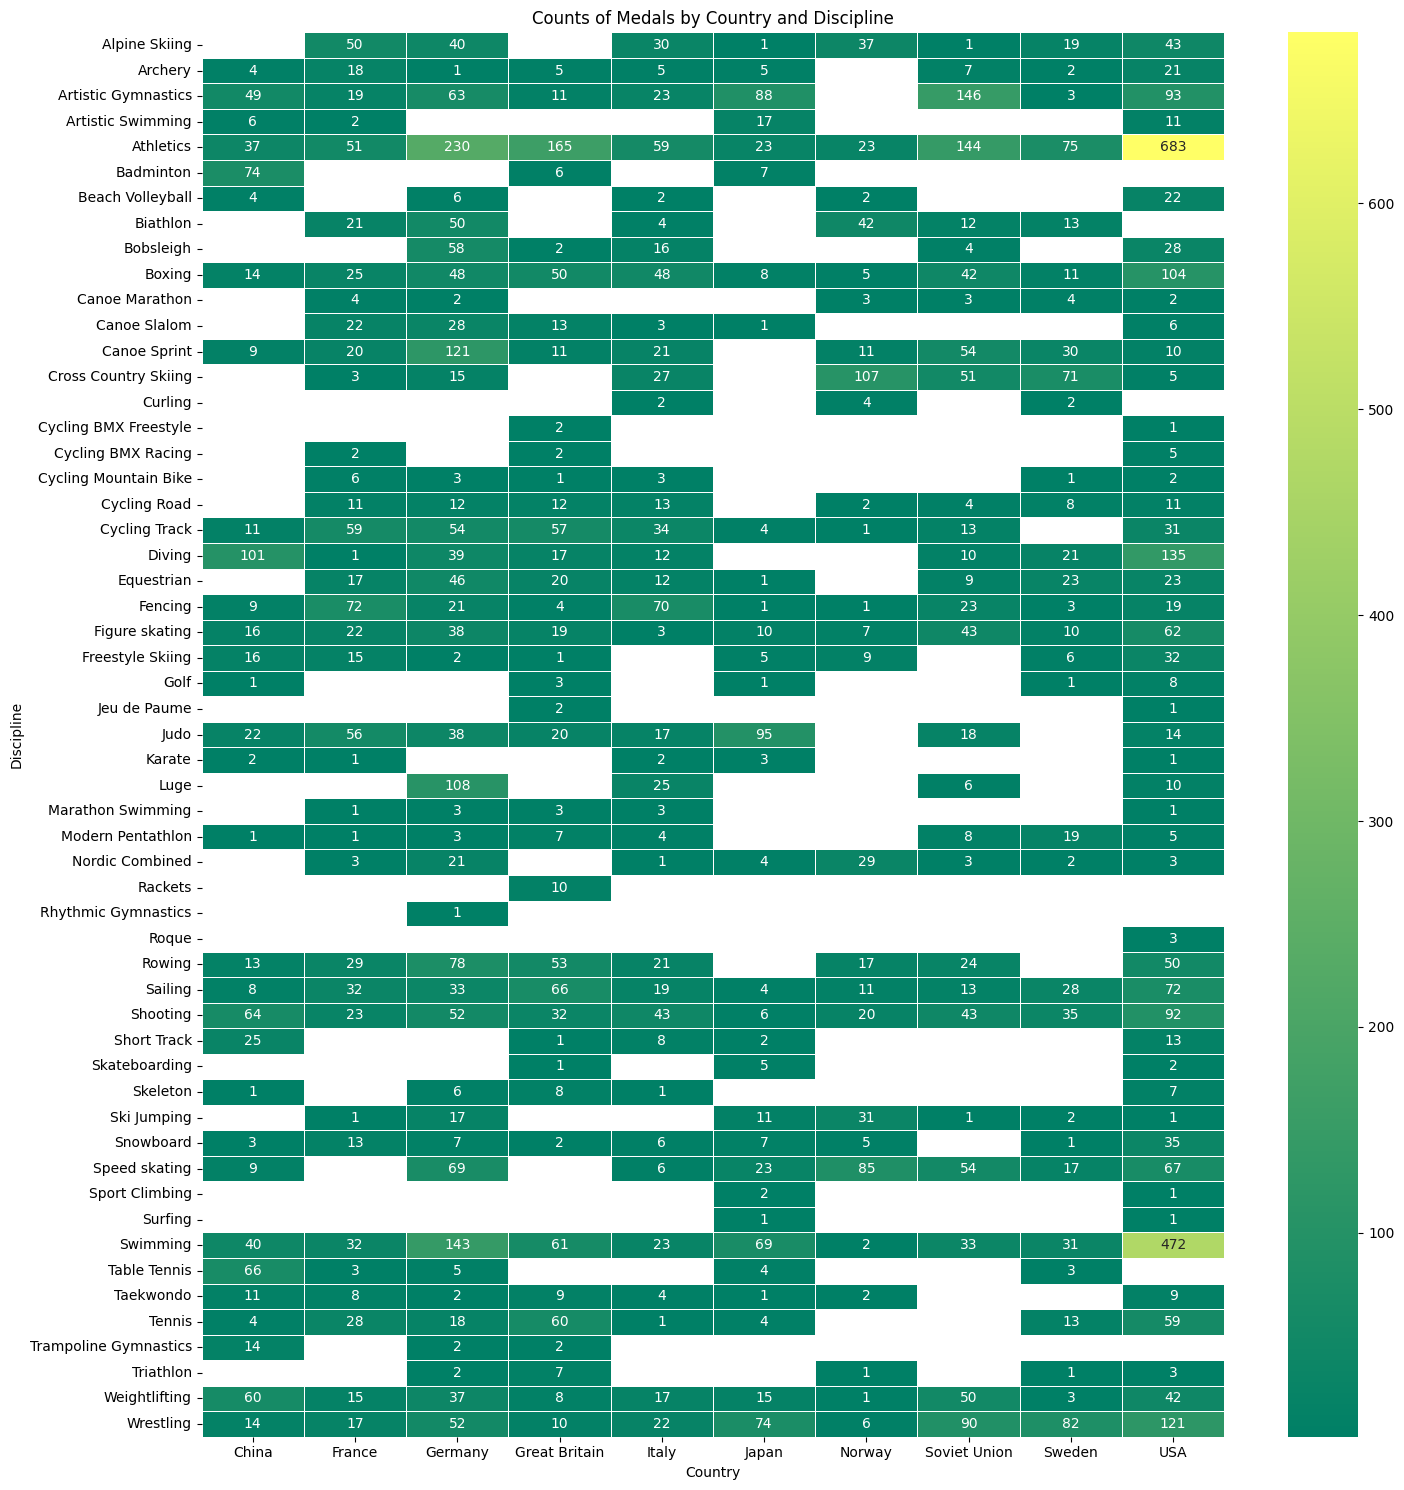

In [122]:
filtered_data = olympic_data[olympic_data['country_name'].isin(countries)]

medal_counts = filtered_data.groupby(['discipline_title', 'country_name']).size().unstack(fill_value = 0)

plt.figure(figsize = (15, 15))
mask = medal_counts == 0
cmap = sns.color_palette('summer', as_cmap = True)
sns.heatmap(medal_counts, annot = True, cmap = cmap, fmt = 'g', linewidths = .5, cbar = True, mask = mask, cbar_kws = {'format': '%d'})
cmap.set_bad(color = 'white')

plt.title('Counts of Medals by Country and Discipline')
plt.xlabel('Country')
plt.ylabel('Discipline')

plt.tight_layout()
plt.show()


In [123]:
print('Top 3 disciplines and medal counts for each country:')
for country in countries:
    top_disciplines = medal_counts.nlargest(3, country)[country]
    print(f'{country}:')
    for discipline, count in top_disciplines.items():
        print(f' {discipline}: {count}')

Top 3 disciplines and medal counts for each country:
USA:
 Athletics: 683
 Swimming: 472
 Diving: 135
Germany:
 Athletics: 230
 Swimming: 143
 Canoe Sprint: 121
Soviet Union:
 Artistic Gymnastics: 146
 Athletics: 144
 Wrestling: 90
Great Britain:
 Athletics: 165
 Sailing: 66
 Swimming: 61
China:
 Diving: 101
 Badminton: 74
 Table Tennis: 66
France:
 Fencing: 72
 Cycling Track: 59
 Judo: 56
Italy:
 Fencing: 70
 Athletics: 59
 Boxing: 48
Sweden:
 Wrestling: 82
 Athletics: 75
 Cross Country Skiing: 71
Japan:
 Judo: 95
 Artistic Gymnastics: 88
 Wrestling: 74
Norway:
 Cross Country Skiing: 107
 Speed skating: 85
 Biathlon: 42


In [124]:
top_disciplines = []
for country in countries:
    top_disciplines.extend(medal_counts.nlargest(3, country).index)

duplicated_disciplines = pd.Series(top_disciplines)[pd.Series(top_disciplines).duplicated()]
duplicated_counts = duplicated_disciplines.value_counts()

print('Duplicated disciplines among the top 3 disciplines for each country:')
print(duplicated_counts)

Duplicated disciplines among the top 3 disciplines for each country:
Athletics               5
Swimming                2
Wrestling               2
Diving                  1
Fencing                 1
Judo                    1
Artistic Gymnastics     1
Cross Country Skiing    1
Name: count, dtype: int64


In [125]:
performances = olympic_data.groupby(['game_year', 'country_name', 'game_location']).size().reset_index(name = 'medal_count')

idx = performances.groupby('game_year')['medal_count'].idxmax()
best_performers = performances.loc[idx]

result_df = best_performers.set_index('game_year')[['country_name']]
result_df.rename(columns = {'country_name': 'Best Performing Country'}, inplace = True)
result_df['Location'] = best_performers.set_index('game_year')['game_location']

result_df

,Best Performing Country,Location
game_year,,
1896,Greece,Greece
1900,France,France
1904,USA,United States
1908,Great Britain,Great Britain
1912,Sweden,Sweden
1920,USA,Belgium
1924,USA,France
1928,USA,Netherlands
1932,USA,United States


In [126]:
count_df = result_df[result_df['Best Performing Country'] == result_df['Location']].groupby('Best Performing Country').size().reset_index(name = 'Home Advantage Count')
count_df = count_df.sort_values(by = 'Home Advantage Count', ascending = False)
count_df

,Best Performing Country,Home Advantage Count
0,China,1
1,France,1
2,Germany,1
3,Great Britain,1
4,Greece,1
5,Norway,1
6,Sweden,1


In [127]:
medals_from_athletes = olympic_data.groupby(['athlete_full_name', 'participant_type', 'country_name']).size().reset_index(name = 'medal_count')

medals_from_athletes = medals_from_athletes.sort_values(by = ['participant_type', 'medal_count'], ascending = [True, False])

top_10_athletes = {}
for types in medals_from_athletes['participant_type'].unique():
    top_10_athletes[types] = medals_from_athletes[medals_from_athletes['participant_type'] == types].head(10)

top_athletes = {}
for types, df in top_10_athletes.items():
    top_athletes[types] = pd.DataFrame(df)

In [128]:
top_athletes['Athlete']


,athlete_full_name,participant_type,country_name,medal_count
7963,Michael PHELPS,Athlete,USA,16
6702,Larisa LATYNINA,Athlete,Soviet Union,14
8530,Nikolay ANDRIANOV,Athlete,Soviet Union,12
396,Alexei NEMOV,Athlete,Russian Federation,10
1485,Boris SHAKHLIN,Athlete,Soviet Union,10
4915,Ireen WÜST,Athlete,Netherlands,10
7529,Marit BJOERGEN,Athlete,Norway,10
10821,Takashi ONO,Athlete,Japan,10
1427,Björn DAEHLIE,Athlete,Norway,9
8682,Ole Einar BJØRNDALEN,Athlete,Norway,9


In [129]:
top_athletes['GameTeam']


,athlete_full_name,participant_type,country_name,medal_count
5043,Ivan PATZAICHIN,GameTeam,Romania,6
968,Antonio ROSSI,GameTeam,Italy,4
1409,Birgit FISCHER,GameTeam,Germany,4
2799,Elana MEYERS TAYLOR,GameTeam,USA,4
4041,Gunnar SETTERWALL,GameTeam,Sweden,4
5078,Iztok COP,GameTeam,Slovenia,4
5217,Jan BEHRENDT,GameTeam,Germany,4
6249,Katalin KOVACS,GameTeam,Hungary,4
6316,Kay BLUHM,GameTeam,Germany,4
6400,Kerri WALSH JENNINGS,GameTeam,USA,4


In [130]:
gold_data = olympic_data[olympic_data['medal_type'] == 'GOLD']

gold_summary = gold_data.groupby('athlete_full_name').agg({
    'event_title': 'count',
    'medal_type': 'size'
})
gold_summary.columns = ['event_participations', 'gold_medals']

all_summary = olympic_data.groupby('athlete_full_name').agg({
    'event_title': 'count',
})
all_summary.rename(columns = {'event_title': 'total_event_participations'}, inplace = True)

final_summary = pd.merge(all_summary, gold_summary, on = 'athlete_full_name', how = 'left').fillna(0)
final_summary = final_summary.drop('event_participations', axis = 1)

final_summary['gold_medals'] = final_summary['gold_medals'].astype(int)
final_summary_sorted = final_summary.sort_values(by = 'gold_medals', ascending = False)

final_summary_sorted.head(10)


,total_event_participations,gold_medals
athlete_full_name,,
Michael PHELPS,16,13
Ray EWRY,8,8
Carl LEWIS,8,7
Vera CASLAVSKA,8,7
Boris SHAKHLIN,10,6
Paavo NURMI,9,6
Gert FREDRIKSSON,7,6
Björn DAEHLIE,9,6
Lidiya SKOBLIKOVA,6,6


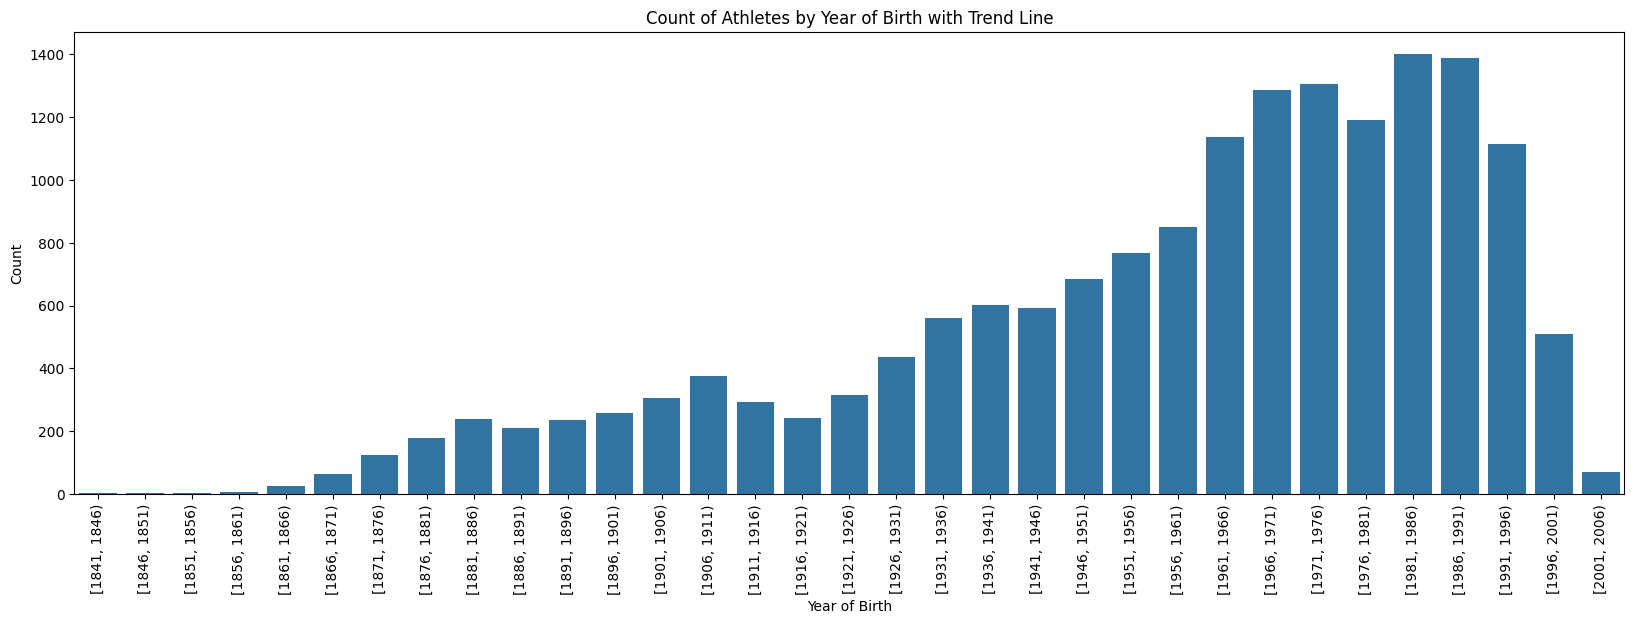

In [131]:
oldest_birth_year = int(min(olympic_data['athlete_year_birth']))
newest_birth_year = int(max(olympic_data['athlete_year_birth']))

birth_year_bins = pd.cut(olympic_data['athlete_year_birth'], bins = range(oldest_birth_year, newest_birth_year + 1, 5), right = False)
birth_year_counts = birth_year_bins.value_counts().sort_index().reset_index()
birth_year_counts.columns = ['Year of Birth', 'Count']

plt.figure(figsize = (20, 6))
sns.barplot(data = birth_year_counts, x = 'Year of Birth', y = 'Count', errorbar = None)

# Customize labels and title
plt.xlabel('Year of Birth')
plt.ylabel('Count')
plt.title('Count of Athletes by Year of Birth with Trend Line')
plt.xticks(rotation = 90)

plt.show()

In [132]:
medals_from_athletes = olympic_data.groupby(['athlete_full_name', 'country_name', 'athlete_year_birth']).size().reset_index(name = 'medal_count')

filtered_data = medals_from_athletes[medals_from_athletes['athlete_year_birth'] > 1996]

filtered_medals_from_athletes = filtered_data.sort_values(by = 'medal_count', ascending = False)


In [133]:
combined_data = pd.merge(filtered_medals_from_athletes, final_summary_sorted[['gold_medals']], on = 'athlete_full_name', how = 'left')
combined_data['gold_medals'] = combined_data['gold_medals'].fillna(0).astype(int)


In [134]:
combined_data.sort_values(by = 'gold_medals', ascending = False).head(10)


,athlete_full_name,country_name,athlete_year_birth,medal_count,gold_medals
0,Katie LEDECKY,USA,1997.0,7,6
1,Simone BILES,USA,1997.0,5,3
7,Ariarne Titmus,Australia,2000.0,3,2
21,Chloe KIM,USA,2000.0,2,2
18,Daiki HASHIMOTO,Japan,2001.0,2,2
44,Robert FINKE,USA,1999.0,2,2
9,Minjeong CHOI,South Korea,1998.0,3,2
40,Qian YANG,China,2000.0,2,2
27,San AN,South Korea,2001.0,2,2
5,Ailing Eileen GU,China,2003.0,3,2


In [135]:
# PREDICTIONS WITH TIME SERIES MODELS
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [136]:
country_medal_counts = medal_counts_df.copy()
country_medal_counts.rename(columns = {'index': 'Year'}, inplace = True)
country_medal_counts.head()

,Year,USA,Germany,Soviet Union,Great Britain,China,France,Italy,Sweden,Japan,Norway
0,1896,11,10,0,6,0,10,0,0,0,0
1,1900,37,2,0,25,0,44,5,1,0,4
2,1904,164,12,0,2,0,0,0,0,0,1
3,1908,33,12,0,95,0,12,3,19,0,5
4,1912,44,20,0,22,0,12,4,45,0,2


In [137]:
country_medal_counts_transposed = country_medal_counts.set_index('Year').transpose()
country_medal_counts_transposed.head()

Year,1896,1900,1904,1908,1912,1920,1924,1928,1932,1936,...,2004,2006,2008,2010,2012,2014,2016,2018,2020,2022
USA,11,37,164,33,44,66,78,49,93,49,...,83,24,90,32,90,28,103,21,95,24
Germany,10,2,12,12,20,0,0,25,17,77,...,42,25,40,30,39,16,33,28,39,27
Soviet Union,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Great Britain,6,25,2,95,22,33,25,14,13,8,...,31,1,46,1,66,2,62,5,56,0
China,0,0,0,0,0,0,0,0,0,0,...,68,13,95,11,94,8,69,9,95,13


In [138]:
X = country_medal_counts_transposed.drop(2022, axis = 1)
y = country_medal_counts_transposed[2022]

models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor())
]

mse_dict = {model_name: [] for model_name, _ in models}

for model_name, model in models:
    model.fit(X, y)

    pred_2022 = model.predict(X)
    pred_2022_round = [round(pred) for pred in pred_2022]
    print(pred_2022_round)

    mse = mean_squared_error(y, pred_2022_round)
    mse_dict[model_name] = mse

print("\nMean Squared Error for predicting year 2022:")
for model_name, mse in mse_dict.items():
    print(f"{model_name}: {mse}")

all_predictions = []

# Iterate over models
for model_name, model in models:
    # Fit the model
    model.fit(X, y)

    # Predict the number of medals for the year 2022
    pred_2022 = model.predict(X)

    # Round the predictions
    pred_2022_round = [round(pred) for pred in pred_2022]

    # Store the predictions
    all_predictions.append(pred_2022_round)

# Ensemble the predictions by averaging
ensemble_pred = [round(sum(preds) / len(preds)) for preds in zip(*all_predictions)]

# Calculate MSE for the ensemble prediction
ensemble_mse = mean_squared_error(y, ensemble_pred)

print(f"\nMean Squared Error for predicting year 2022 (Ensemble): {ensemble_mse}")
print(ensemble_pred)

[24, 27, 0, 0, 13, 12, 17, 16, 14, 33]
[24, 27, 0, 0, 13, 12, 17, 16, 14, 33]
[24, 27, 0, 0, 13, 12, 17, 16, 14, 33]
[16, 14, 15, 12, 11, 18, 18, 18, 18, 18]
[24, 27, 0, 0, 13, 12, 17, 16, 14, 33]
[22, 24, 4, 5, 13, 13, 16, 16, 13, 28]
[24, 27, 0, 0, 13, 12, 17, 16, 14, 33]

Mean Squared Error for predicting year 2022:
Linear Regression: 0.0
Ridge Regression: 0.0
Lasso Regression: 0.0
K-Nearest Neighbors: 88.8
Decision Tree: 0.0
Random Forest: 8.2
Gradient Boosting: 0.0

Mean Squared Error for predicting year 2022 (Ensemble): 2.9
[23, 25, 3, 2, 13, 13, 17, 16, 15, 30]


In [139]:
country_medal_counts_transposed[2022]


USA              24
Germany          27
Soviet Union      0
Great Britain     0
China            13
France           12
Italy            17
Sweden           16
Japan            14
Norway           33
Name: 2022, dtype: int64

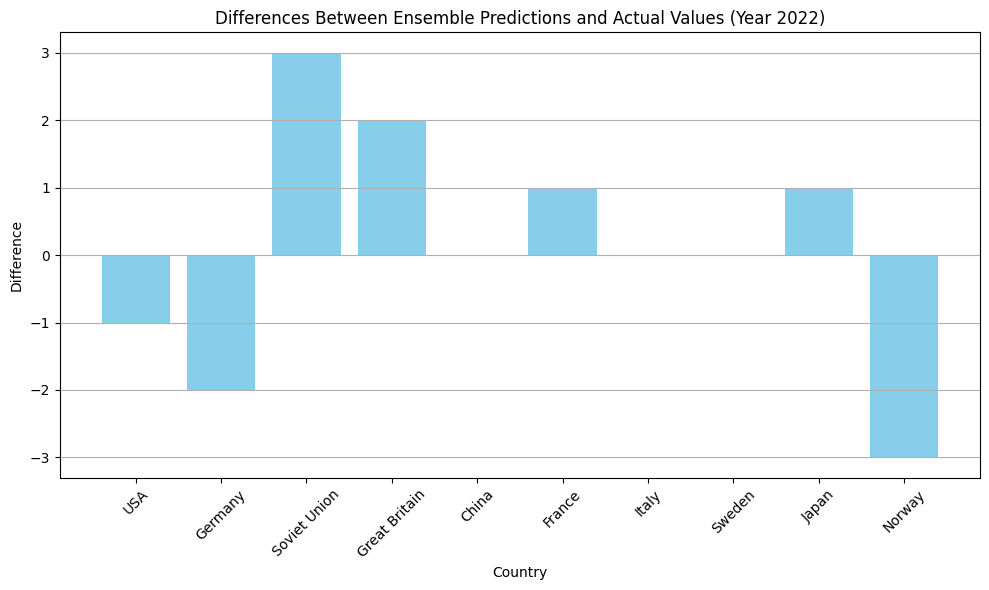

In [140]:
differences = [ensemble_pred[i] - y.iloc[i] for i in range(len(ensemble_pred))]

# Get the countries
countries = y.index

# Plot the differences
plt.figure(figsize = (10, 6))
plt.bar(countries, differences, color = 'skyblue')
plt.title('Differences Between Ensemble Predictions and Actual Values (Year 2022)')
plt.xlabel('Country')
plt.ylabel('Difference')
plt.xticks(rotation=45)
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

In [141]:
years_to_pred = [2024, 2026, 2028, 2030]
all_pred = []

for year in years_to_pred:
    year_pred = []

    for model_name, model in models:
        model.fit(X, y)

        pred = model.predict(X)
        pred_round = [round(pred) for pred in pred]

        year_pred.append(pred_round)

    ensemble_pred = [round(sum(preds) / len(preds)) for preds in zip(*year_pred)]

    all_pred.append(ensemble_pred)

for year, pred in zip(years_to_pred, all_pred):
    country_medal_counts_transposed[year] = pred

In [142]:
country_medal_counts_transposed


Year,1896,1900,1904,1908,1912,1920,1924,1928,1932,1936,...,2012,2014,2016,2018,2020,2022,2024,2026,2028,2030
USA,11,37,164,33,44,66,78,49,93,49,...,90,28,103,21,95,24,23,23,23,23
Germany,10,2,12,12,20,0,0,25,17,77,...,39,16,33,28,39,27,25,25,25,25
Soviet Union,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,3,3,3
Great Britain,6,25,2,95,22,33,25,14,13,8,...,66,2,62,5,56,0,2,2,2,2
China,0,0,0,0,0,0,0,0,0,0,...,94,8,69,9,95,13,13,13,13,13
France,10,44,0,12,12,29,34,15,17,13,...,31,14,36,13,23,12,13,13,13,13
Italy,0,5,0,3,4,16,9,11,26,13,...,22,6,26,8,34,17,17,17,17,17
Sweden,0,1,0,19,45,44,20,23,23,22,...,8,12,10,10,7,16,16,16,16,16
Japan,0,0,0,0,0,3,1,4,13,17,...,31,7,37,11,50,14,14,14,14,14
Norway,0,4,1,5,2,12,23,16,9,17,...,3,24,5,33,8,33,30,30,30,30


In [143]:

country_medal_counts_retransposed = country_medal_counts_transposed.transpose()
country_medal_counts_retransposed.tail()

,USA,Germany,Soviet Union,Great Britain,China,France,Italy,Sweden,Japan,Norway
Year,,,,,,,,,,
2022,24,27,0,0,13,12,17,16,14,33
2024,23,25,2,2,13,13,17,16,14,30
2026,23,25,3,2,13,13,17,16,14,30
2028,23,25,3,2,13,13,17,16,14,30
2030,23,25,3,2,13,13,17,16,14,30


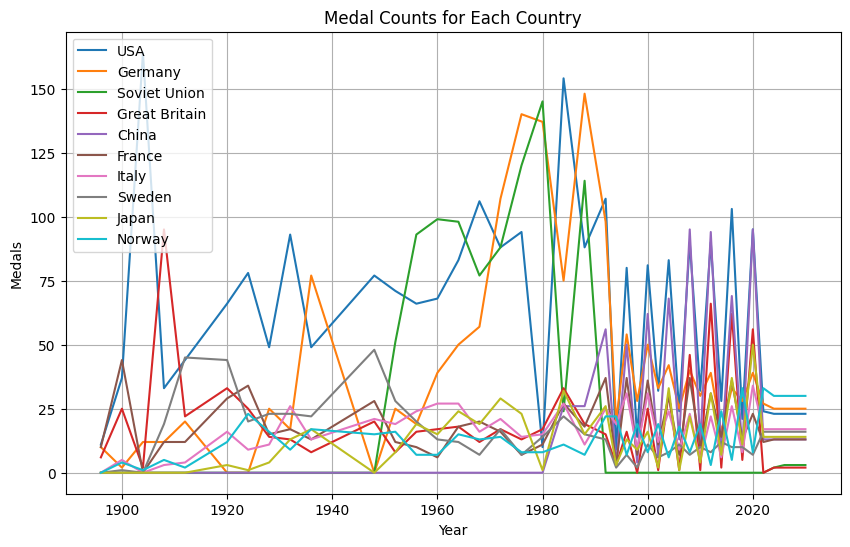

In [144]:
# Plot the predictions for each country
plt.figure(figsize = (10, 6))
for country in country_medal_counts_retransposed.columns:
    plt.plot(country_medal_counts_retransposed.index, country_medal_counts_retransposed[country], label = country)

plt.xlabel('Year')
plt.ylabel('Medals')
plt.title('Medal Counts for Each Country')
plt.legend()
plt.grid(True)
plt.show()


In [145]:
# PREDICTIONS WITH TIME SERIES MODELS
medal_counts_dict = {}

for column in medal_counts_df.columns:
    medal_counts_column = medal_counts_df[['index', column]]
    medal_counts_column = medal_counts_column.squeeze()
    medal_counts_dict[column] = medal_counts_column

In [146]:
medal_counts_usa_all = medal_counts_dict['USA']
medal_counts_germany_all = medal_counts_dict['Germany']
medal_counts_sovietunion_all = medal_counts_dict['Soviet Union']
medal_counts_greatbritain_all = medal_counts_dict['Great Britain']
medal_counts_china_all = medal_counts_dict['China']
medal_counts_france_all = medal_counts_dict['France']
medal_counts_italy_all = medal_counts_dict['Italy']
medal_counts_sweden_all = medal_counts_dict['Sweden']
medal_counts_japan_all = medal_counts_dict['Japan']
medal_counts_norway_all = medal_counts_dict['Norway']

medal_counts_usa_all.set_index('index', inplace = True)
medal_counts_germany_all.set_index('index', inplace = True)
medal_counts_sovietunion_all.set_index('index', inplace = True)
medal_counts_greatbritain_all.set_index('index', inplace = True)
medal_counts_china_all.set_index('index', inplace = True)
medal_counts_france_all.set_index('index', inplace = True)
medal_counts_italy_all.set_index('index', inplace = True)
medal_counts_sweden_all.set_index('index', inplace = True)
medal_counts_japan_all.set_index('index', inplace = True)
medal_counts_norway_all.set_index('index', inplace = True)

medal_counts_usa_all = medal_counts_usa_all.squeeze()
medal_counts_germany_all = medal_counts_germany_all.squeeze()
medal_counts_sovietunion_all = medal_counts_sovietunion_all.squeeze()
medal_counts_greatbritain_all = medal_counts_greatbritain_all.squeeze()
medal_counts_china_all = medal_counts_china_all.squeeze()
medal_counts_france_all = medal_counts_france_all.squeeze()
medal_counts_italy_all = medal_counts_italy_all.squeeze()
medal_counts_sweden_all = medal_counts_sweden_all.squeeze()
medal_counts_japan_all = medal_counts_japan_all.squeeze()
medal_counts_norway_all = medal_counts_norway_all.squeeze()

In [147]:
# CREATING TWO DIFFERENT TIME SERIES MODELS FOR PREDICTIONS
def fit_model(df, seasonal = False):
    if seasonal:
        model = pm.auto_arima(df,
                            start_p = 1,
                            start_q = 1,
                            test = 'adf',
                            max_p = 3, max_q = 3,
                            m = 4,
                            start_P = 0,
                            seasonal = True,
                            d = None,
                            D = 1,
                            trace = False,
                            error_action = 'ignore',
                            suppress_warnings = True,
                            stepwise = True)
    else:
        model = pm.auto_arima(df,
                            start_p = 1,
                            start_q = 1,
                            test = 'adf',
                            max_p = 3, max_q = 3,
                            m = 1,
                            d = None,
                            seasonal = False,
                            trace = False,
                            error_action = 'warn',
                            suppress_warnings = True,
                            stepwise = True)

    return model

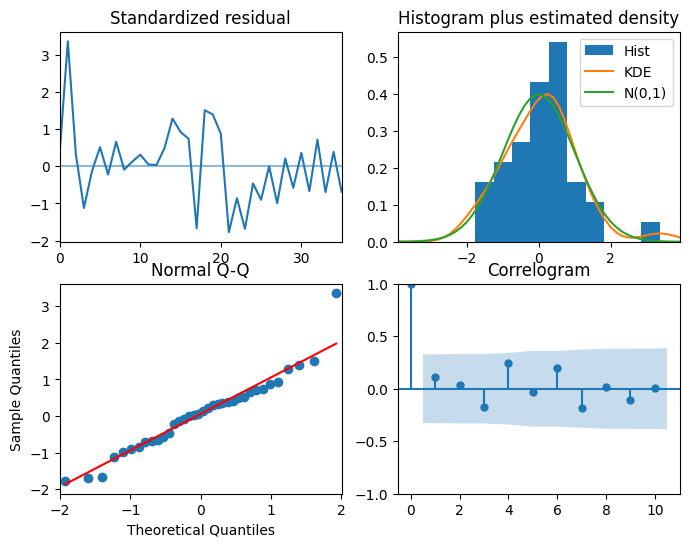

In [148]:
fit_model(medal_counts_usa_all).plot_diagnostics(figsize = (8, 6))
plt.show()

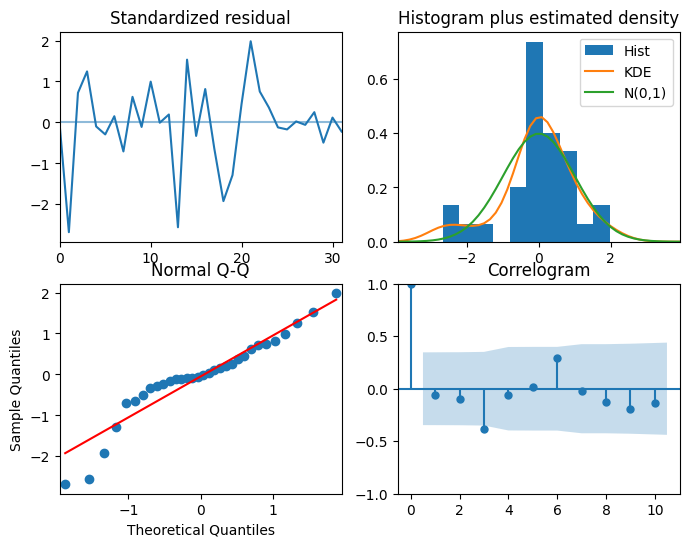

In [149]:
fit_model(medal_counts_usa_all, seasonal = True).plot_diagnostics(figsize = (8, 6))
plt.show()

In [150]:
fitted_series_dict = {}

def forecast(model, df, periods, country_name):
    global fitted_series_dict

    df.index = pd.to_datetime(df.index, format = '%Y')

    n_periods = periods
    fitted, confint = model.predict(n_periods = n_periods, return_conf_int = True)

    last_index = df.index[-1]

    index_of_fc = pd.date_range(last_index, periods = n_periods + 1, freq = '2YS')[1:]

    fitted_series = pd.Series(fitted.values, index = index_of_fc)
    fitted_series_dict[country_name] = fitted_series

    lower_series = pd.Series(confint[:, 0], index = index_of_fc)
    upper_series = pd.Series(confint[:, 1], index = index_of_fc)

    observed_values = df[-len(fitted_series):]
    rmse = np.sqrt(np.mean((fitted - observed_values.values) ** 2))
    print('RMSE:', rmse)

    plt.figure(figsize = (15, 7))
    plt.plot(df.index, df.values, color = '#1f76b4', label = 'Original')
    plt.plot(fitted_series.index, fitted_series.values, color = 'darkgreen', label = 'Forecast')
    plt.fill_between(lower_series.index,
                    lower_series,
                    upper_series,
                    color = 'k', alpha = .15)

    plt.title('Forecast')
    plt.xlabel('Year')
    plt.ylabel('Medals')
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE: 30.568740293933278


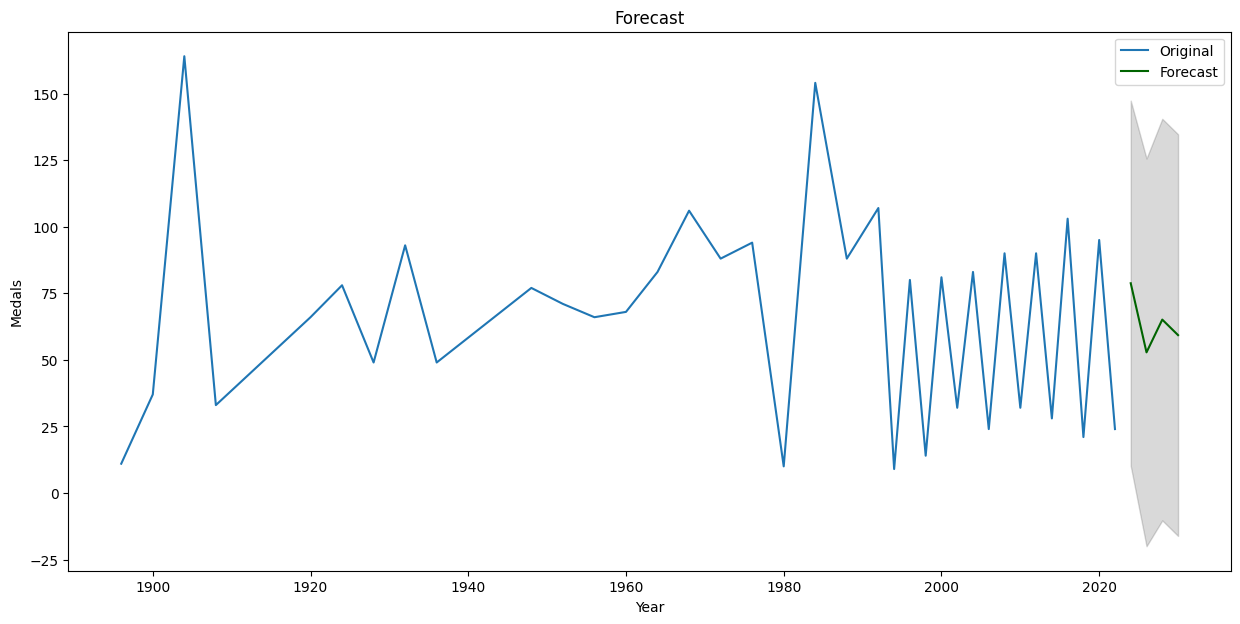

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE: 3.3175700302885702


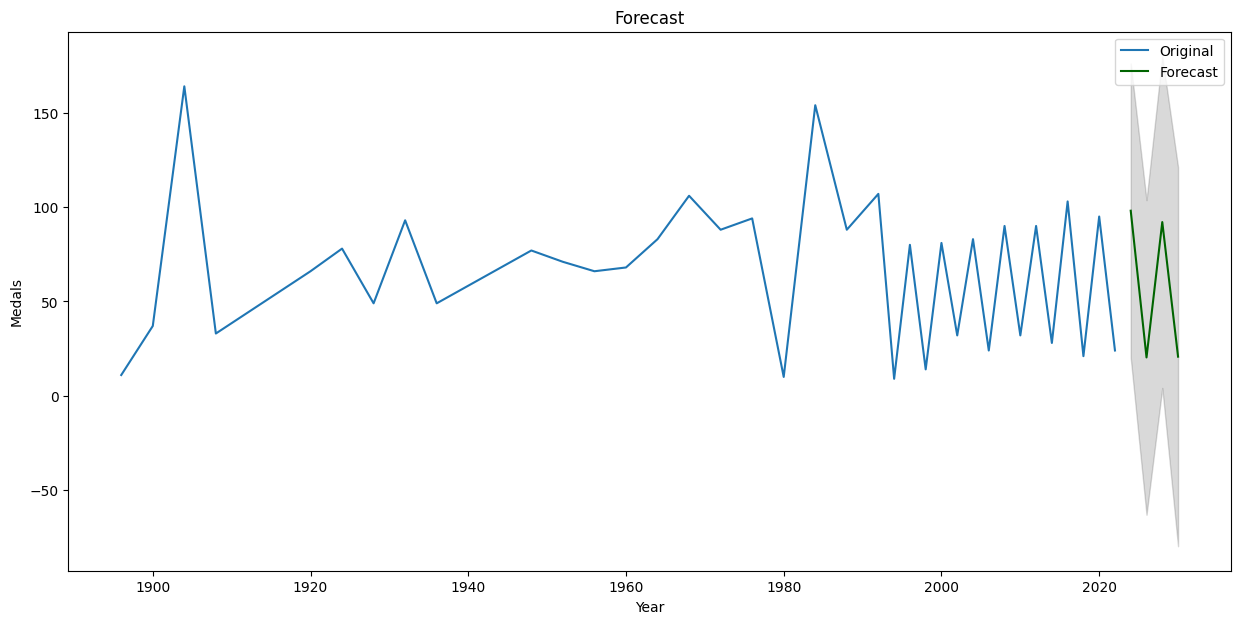

In [151]:
forecast(fit_model(medal_counts_usa_all), medal_counts_usa_all, 4, 'USA')
forecast(fit_model(medal_counts_usa_all, seasonal = True), medal_counts_usa_all, 4, 'USA')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE: 5.389008813383044


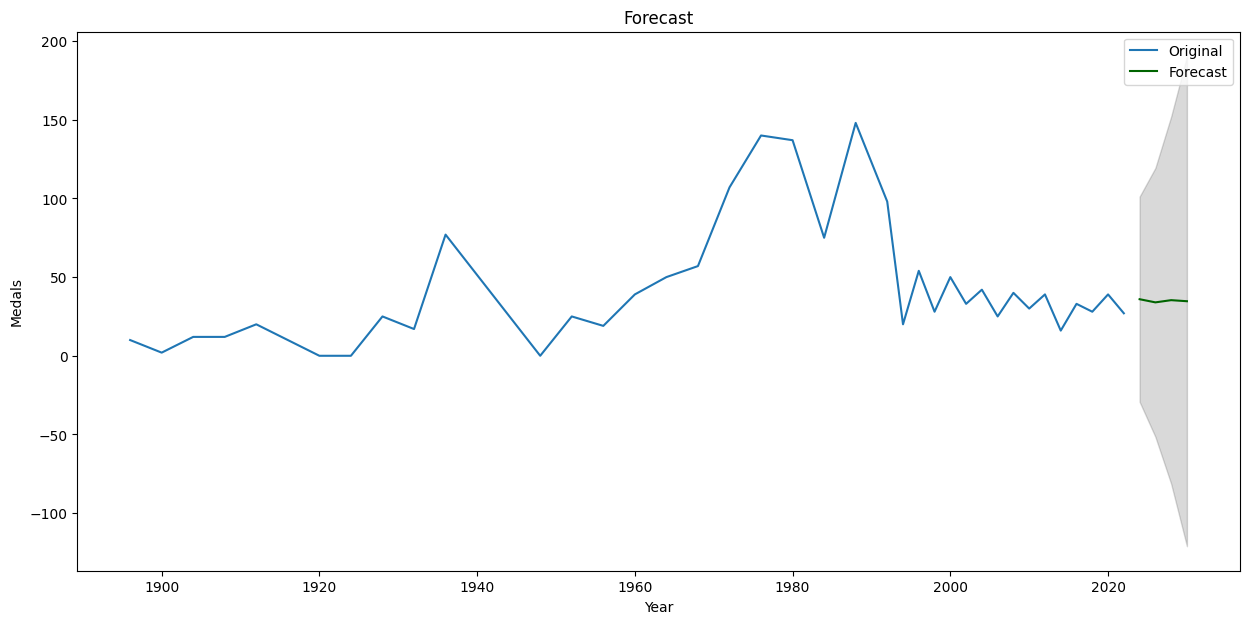

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE: 4.450497573358825


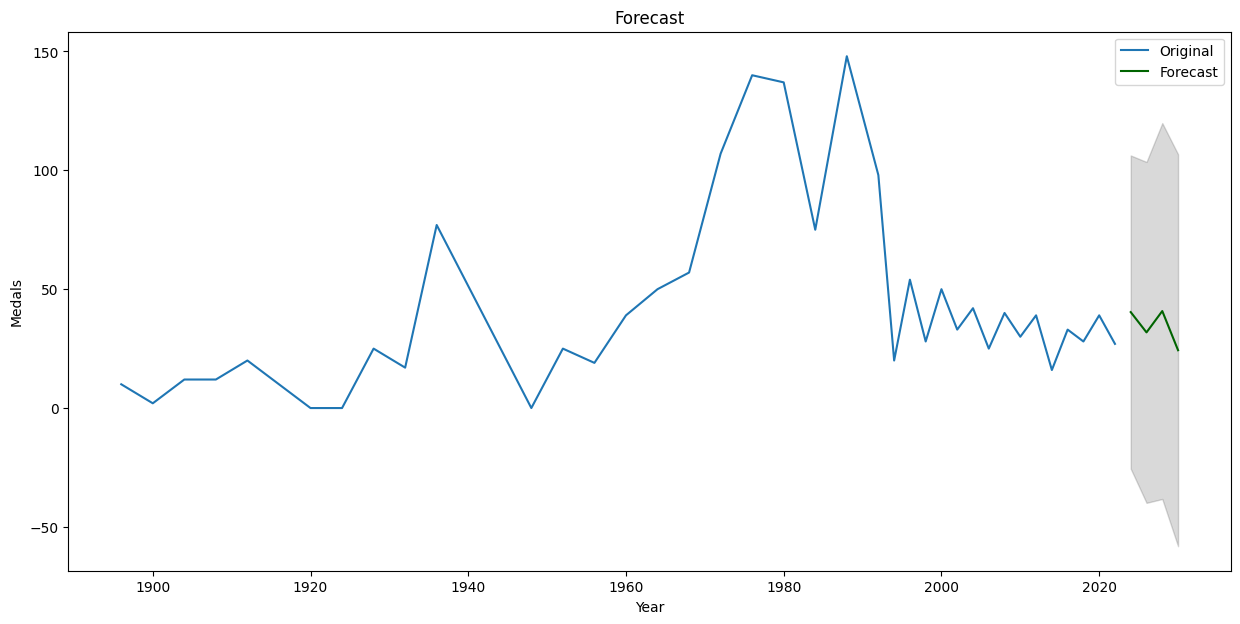

In [152]:
forecast(fit_model(medal_counts_germany_all), medal_counts_germany_all, 4, 'Germany')
forecast(fit_model(medal_counts_germany_all, seasonal = True), medal_counts_germany_all, 4, 'Germany')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE: 1.4209136632668884e-62


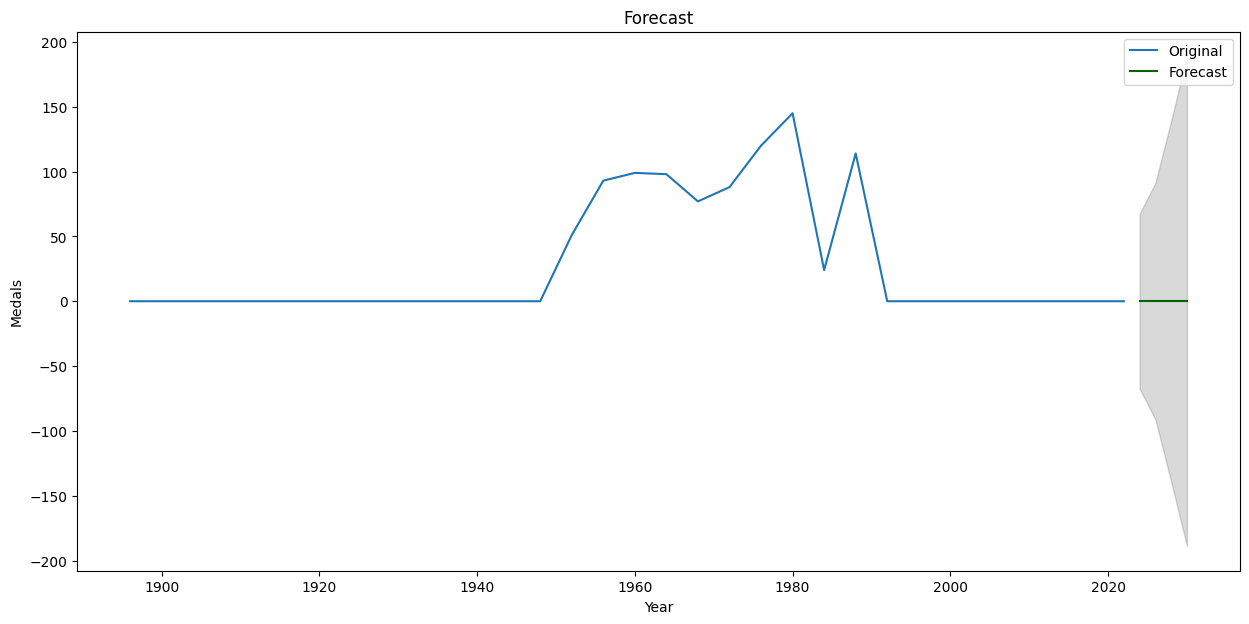

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE: 3.6663371663991486


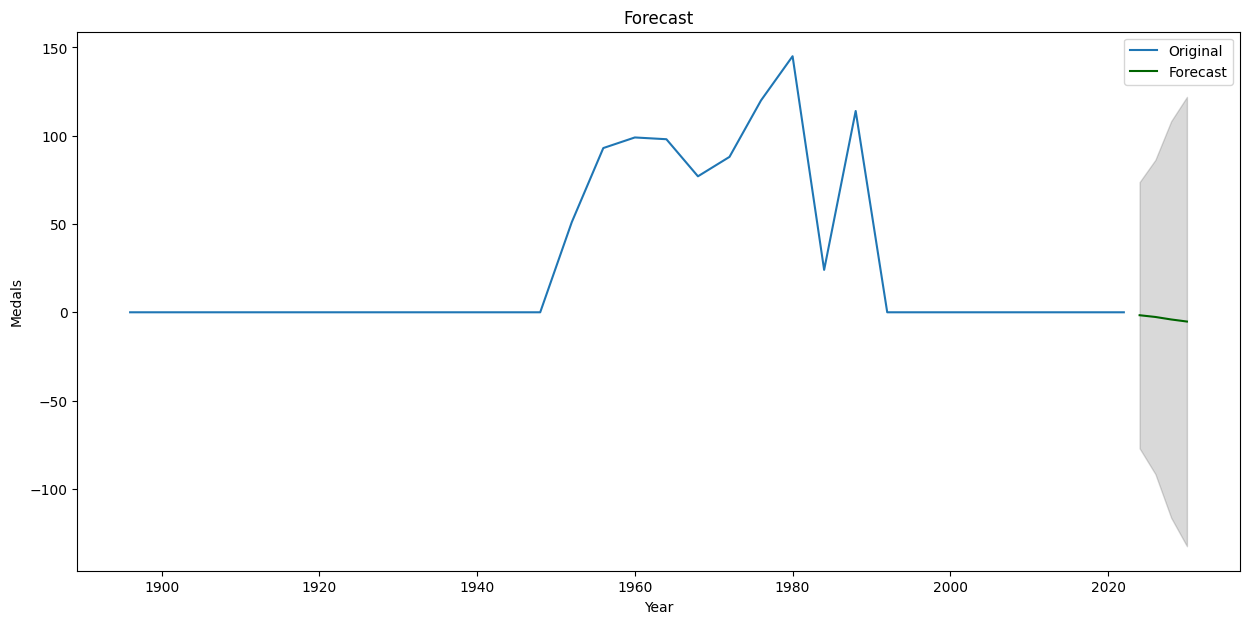

In [153]:
forecast(fit_model(medal_counts_sovietunion_all), medal_counts_sovietunion_all, 4, 'Soviet Union')
forecast(fit_model(medal_counts_sovietunion_all, seasonal = True), medal_counts_sovietunion_all, 4, 'Soviet Union')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE: 10.650344638506345


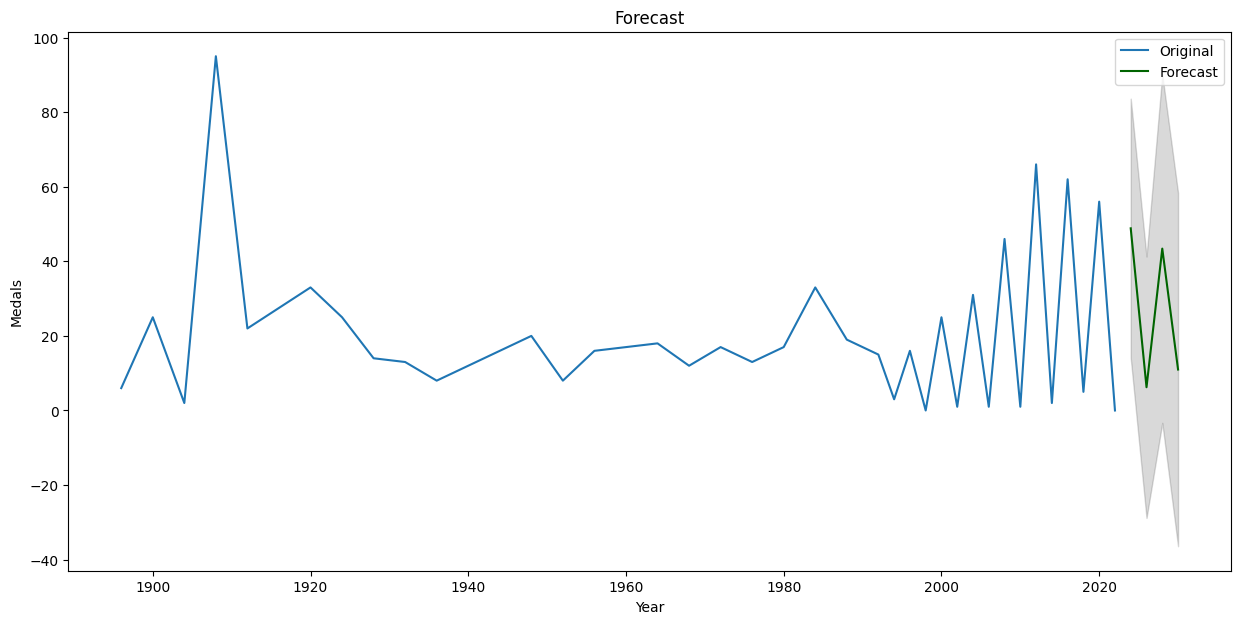

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE: 2.1385647548688542


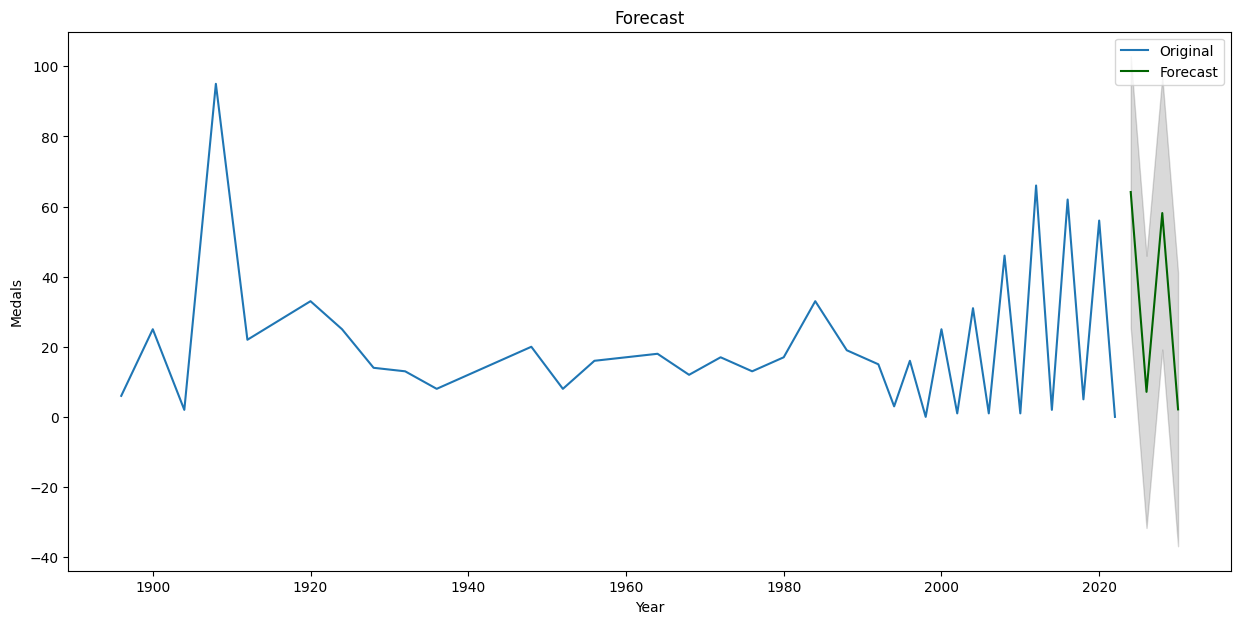

In [154]:
forecast(fit_model(medal_counts_greatbritain_all), medal_counts_greatbritain_all, 4, 'Great Britain')
forecast(fit_model(medal_counts_greatbritain_all, seasonal = True), medal_counts_greatbritain_all, 4, 'Great Britain')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE: 15.131867988699307


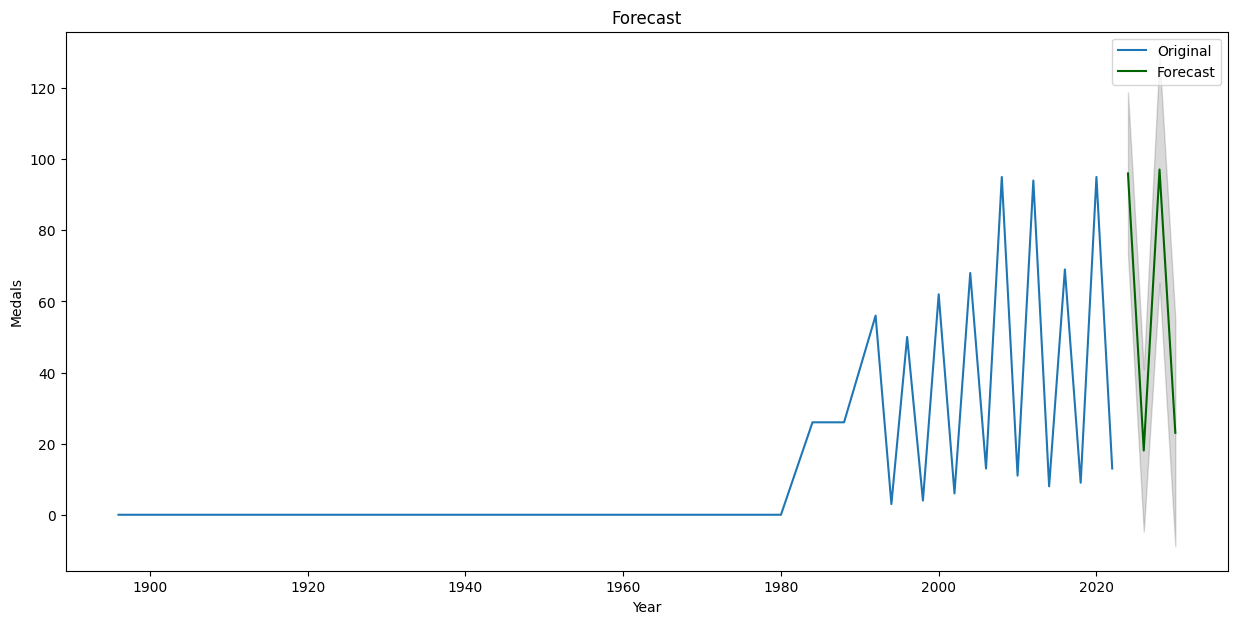

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE: 15.636056936999164


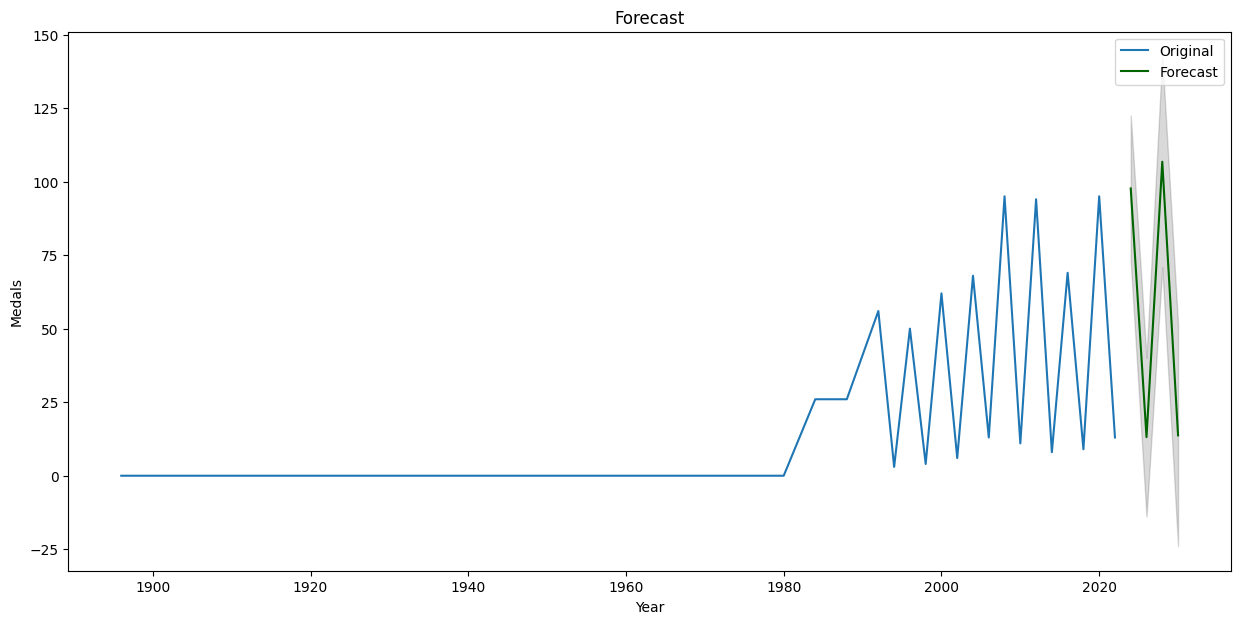

In [155]:
forecast(fit_model(medal_counts_china_all), medal_counts_china_all, 4, 'China')
forecast(fit_model(medal_counts_china_all, seasonal = True), medal_counts_china_all, 4, 'China')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE: 7.593245202612065


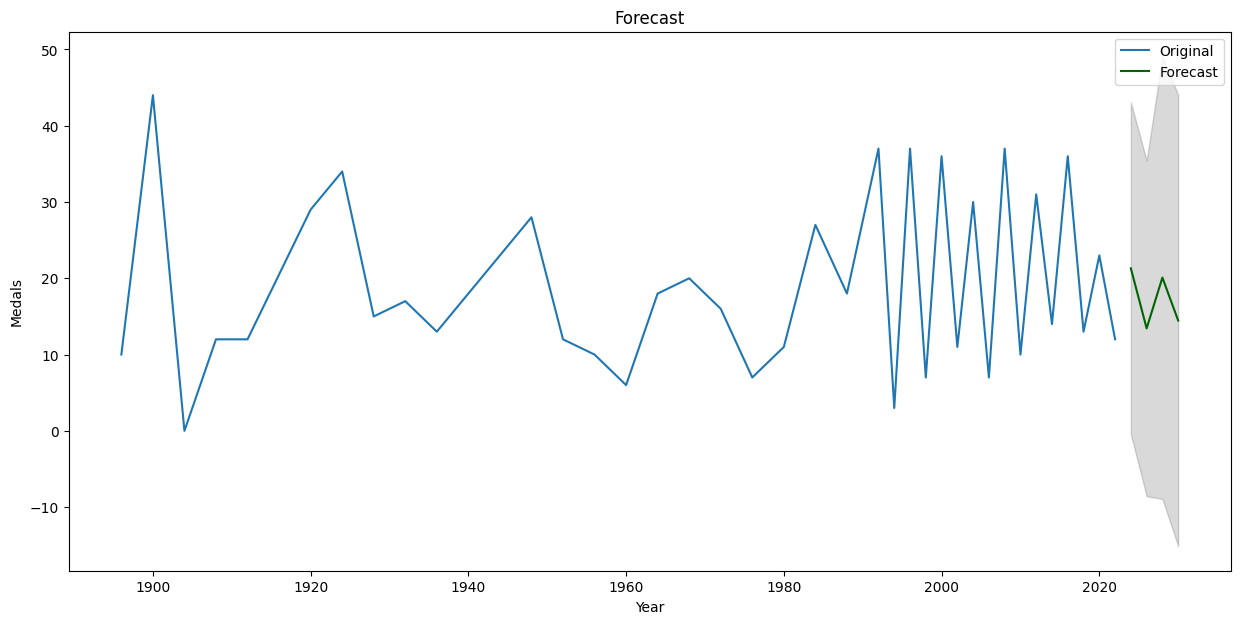

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE: 4.701268330223203


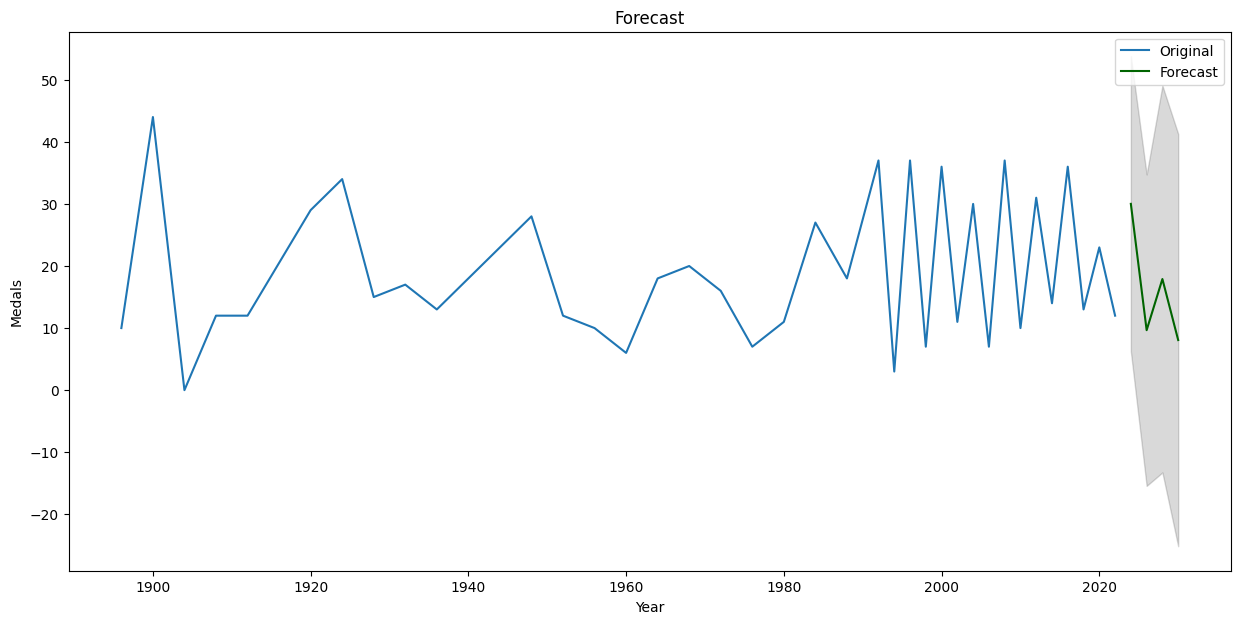

In [156]:
forecast(fit_model(medal_counts_france_all), medal_counts_france_all, 4, 'France')
forecast(fit_model(medal_counts_france_all, seasonal = True), medal_counts_france_all, 4, 'France')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE: 11.753910866482833


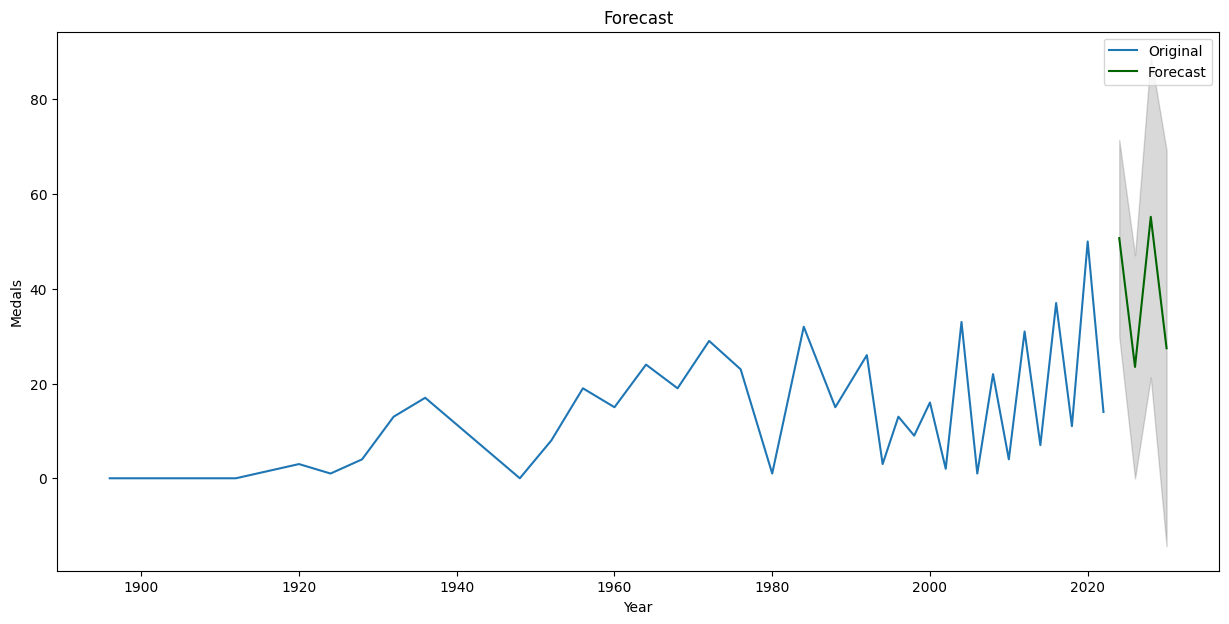

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE: 7.0518224932699916


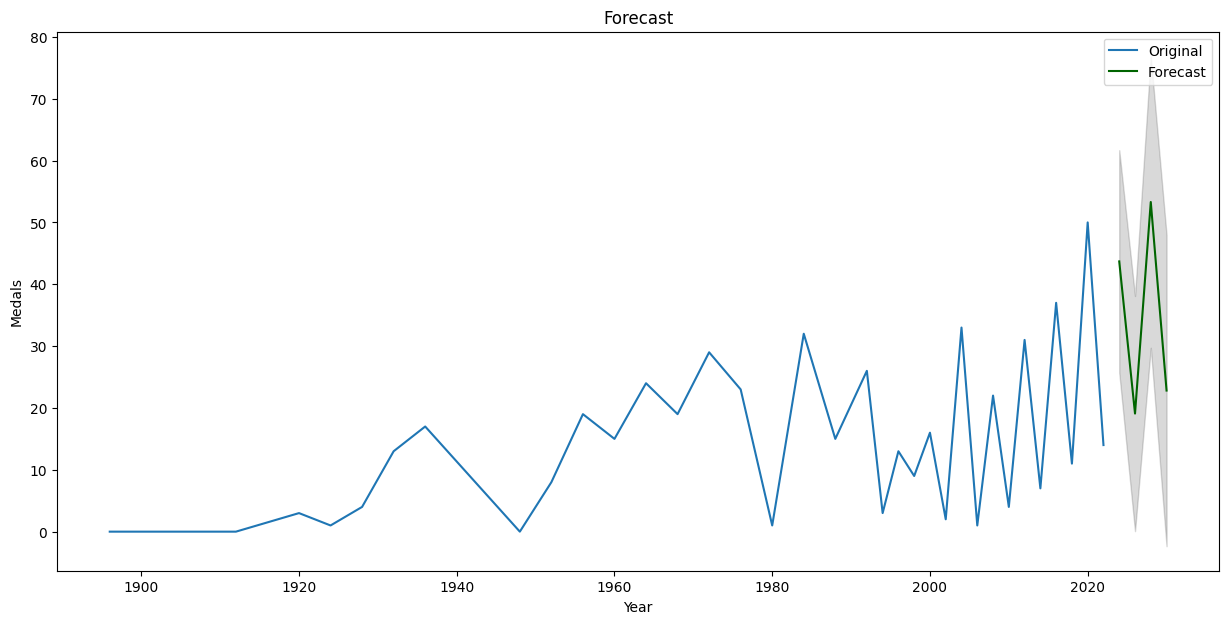

In [157]:
forecast(fit_model(medal_counts_japan_all), medal_counts_japan_all, 4, 'Japan')
forecast(fit_model(medal_counts_japan_all, seasonal = True), medal_counts_japan_all, 4, 'Japan')


In [158]:
highest_medals_per_year_all = {}

for country_name, fitted_series in fitted_series_dict.items():
    rounded_fitted_series = fitted_series.round().astype(int)
    highest_medals_per_year = rounded_fitted_series.groupby(rounded_fitted_series.index.year).max()
    for year, medals in highest_medals_per_year.items():
        if year not in highest_medals_per_year_all:
            highest_medals_per_year_all[year] = {'country': country_name, 'medals': medals}
        elif medals > highest_medals_per_year_all[year]['medals']:
            highest_medals_per_year_all[year] = {'country': country_name, 'medals': medals}

for year, data in highest_medals_per_year_all.items():
    print(f"In {year}, the country predicted to get the highest medals ({data['medals']}) is {data['country']}.")


In 2024, the country predicted to get the highest medals (98) is USA.
In 2026, the country predicted to get the highest medals (32) is Germany.
In 2028, the country predicted to get the highest medals (107) is China.
In 2030, the country predicted to get the highest medals (24) is Germany.
